In [87]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier

In [89]:
df=pd.read_csv('YourCabs.csv')

In [90]:
df.head()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   travel_type_id       43431 non-null  int64  
 4   package_id           7550 non-null   float64
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [92]:
df.describe()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,43431.000000,7550.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.137252,2.030066,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,0.437712,1.461756,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,2.000000,1.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,3.000000,7.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [93]:
df.shape

(43431, 18)

# Data Preprocessing

In [94]:
df.columns

Index(['id', 'user_id', 'vehicle_model_id', 'travel_type_id', 'package_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [95]:
# We split a data based on travel type
df_tt_1=df[df['travel_type_id']==1]
df_tt_2=df[df['travel_type_id']==2]
df_tt_3=df[df['travel_type_id']==3]

In [96]:
print('df_tt_1',df_tt_1.shape)
print('df_tt_2',df_tt_2.shape)
print('df_tt_3',df_tt_3.shape)

df_tt_1 (1589, 18)
df_tt_2 (34292, 18)
df_tt_3 (7550, 18)


In [97]:
#  checking value_counts
for i in df_tt_1.columns:
  print(df_tt_1[i].value_counts())

132519    1
169303    1
169270    1
169264    1
169251    1
         ..
149553    1
149552    1
149547    1
149544    1
185916    1
Name: id, Length: 1589, dtype: int64
868      9
27679    8
18046    5
42923    4
41535    4
        ..
31277    1
31274    1
19006    1
31229    1
48714    1
Name: user_id, Length: 1413, dtype: int64
12    734
65    365
87    158
89     93
54     72
85     57
24     47
28     34
13      7
10      6
23      4
90      3
36      3
86      2
14      1
69      1
70      1
30      1
Name: vehicle_model_id, dtype: int64
1    1589
Name: travel_type_id, dtype: int64
Series([], Name: package_id, dtype: int64)
393.0     257
571.0      98
585.0      47
142.0      44
293.0      32
         ... 
727.0       1
1299.0      1
1283.0      1
398.0       1
1180.0      1
Name: from_area_id, Length: 297, dtype: int64
1080.0    1
Name: to_area_id, dtype: int64
15.0    1281
1.0      106
31.0       6
Name: from_city_id, dtype: int64
32.0     475
55.0     174
29.0     116
146.0    

In [98]:
df_tt_1.isnull().sum()*100/len(df_tt_1)

id                       0.000000
user_id                  0.000000
vehicle_model_id         0.000000
travel_type_id           0.000000
package_id             100.000000
from_area_id             5.538074
to_area_id              99.937067
from_city_id            12.334802
to_city_id               0.062933
from_date                0.000000
online_booking           0.000000
mobile_site_booking      0.000000
booking_created          0.000000
from_lat                 5.852738
from_long                5.852738
to_lat                  99.937067
to_long                 99.937067
Car_Cancellation         0.000000
dtype: float64

In [99]:
# we drop columns
df_tt_1.drop(['package_id','user_id','id','to_area_id','to_lat','to_long','from_lat','from_long'],inplace=True,axis=1)

<Axes: >

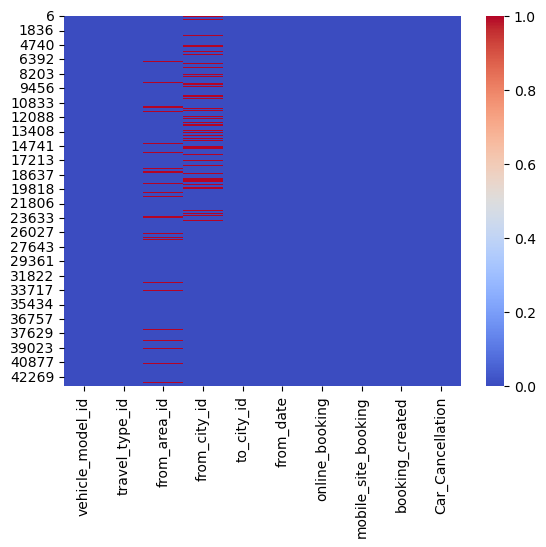

In [100]:
# Checking null values
sns.heatmap(df_tt_1.isnull(),cmap='coolwarm')

In [101]:
df_tt_1.isnull().sum()*100/len(df_tt_1)

vehicle_model_id        0.000000
travel_type_id          0.000000
from_area_id            5.538074
from_city_id           12.334802
to_city_id              0.062933
from_date               0.000000
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
Car_Cancellation        0.000000
dtype: float64

In [102]:
df_tt_1['from_area_id']=df_tt_1['from_area_id'].fillna(df_tt_1['from_area_id'].mean())
df_tt_1['from_city_id']=df_tt_1['from_city_id'].fillna(df_tt_1['from_city_id'].mean())
df_tt_1['to_city_id']=df_tt_1['to_city_id'].fillna(df_tt_1['to_city_id'].mean())

In [103]:
df_tt_1.head()

,vehicle_model_id,travel_type_id,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
6,12,1,571.0,15.000000,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0
17,24,1,1383.0,14.003589,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0
24,54,1,515.0,15.000000,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0
158,28,1,136.0,1.000000,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0
216,87,1,1118.0,14.003589,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0


In [104]:
df_tt_1['vehicle_model_id'].value_counts()

12    734
65    365
87    158
89     93
54     72
85     57
24     47
28     34
13      7
10      6
23      4
90      3
36      3
86      2
14      1
69      1
70      1
30      1
Name: vehicle_model_id, dtype: int64

In [105]:
# We assign 12 as 0 and other for 1
df_tt_1['vehicle_model_12']=np.where(df_tt_1['vehicle_model_id']==12,0,1)

In [106]:
# Create group by from_area_id
df_tt_1['from_area_cancel_per']=df_tt_1.groupby('from_area_id')['Car_Cancellation'].transform('mean')

In [107]:
df_tt_1.columns

Index(['vehicle_model_id', 'travel_type_id', 'from_area_id', 'from_city_id',
       'to_city_id', 'from_date', 'online_booking', 'mobile_site_booking',
       'booking_created', 'Car_Cancellation', 'vehicle_model_12',
       'from_area_cancel_per'],
      dtype='object')

In [108]:
df_tt_1['Cancel_from_city_id']=df_tt_1.groupby('from_city_id')['Car_Cancellation'].transform('mean')

In [109]:
df_tt_1['Cancel_from_city_id'].describe()

count    1589.000000
mean        0.013216
std         0.004325
min         0.000000
25%         0.013271
50%         0.013271
75%         0.013271
max         0.020408
Name: Cancel_from_city_id, dtype: float64

In [110]:
# We split from_city_cancel_per in three part line high,mediam and low
df_tt_1['Cancel_from_city_id']=np.where(df_tt_1['Cancel_from_city_id']>=0.60,'High',
                                         np.where(df_tt_1['Cancel_from_city_id']==0,'Zero',
                                                  np.where(df_tt_1['Cancel_from_city_id']<=0.30,'Low','Median')))

In [111]:
df_tt_1['from_area_cancel_per'].describe()

count    1589.000000
mean        0.013216
std         0.044404
min         0.000000
25%         0.000000
50%         0.000000
75%         0.003891
max         0.500000
Name: from_area_cancel_per, dtype: float64

In [112]:
# We split from_area_cancel_per in three part line high,mediam and low
df_tt_1['from_area_cancel_per']=np.where(df_tt_1['from_area_cancel_per']>=0.60,'High',
                                         np.where(df_tt_1['from_area_cancel_per']==0,'Zero',
                                                  np.where(df_tt_1['from_area_cancel_per']<=0.30,'Low','Median')))

In [113]:
df_tt_1.head()

,vehicle_model_id,travel_type_id,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,vehicle_model_12,from_area_cancel_per,Cancel_from_city_id
6,12,1,571.0,15.000000,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,0,Low,Low
17,24,1,1383.0,14.003589,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0,1,Zero,Low
24,54,1,515.0,15.000000,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0,1,Zero,Low
158,28,1,136.0,1.000000,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0,1,Zero,Zero
216,87,1,1118.0,14.003589,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0,1,Zero,Low


In [114]:
# We Merge the from_city_id and to_city in one column
df_tt_1['From_city_to_city']=df_tt_1['from_city_id'].round(1).astype('str')+'--'+df_tt_1['to_city_id'].round(1).astype('str')

In [115]:
# we drop from_area_id , from_city_id and to_city_id
df_tt_1.drop(['travel_type_id','from_area_id','to_city_id','vehicle_model_id','from_city_id'],inplace=True,axis=1)

In [116]:
df_tt_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   from_date             1589 non-null   object
 1   online_booking        1589 non-null   int64 
 2   mobile_site_booking   1589 non-null   int64 
 3   booking_created       1589 non-null   object
 4   Car_Cancellation      1589 non-null   int64 
 5   vehicle_model_12      1589 non-null   int32 
 6   from_area_cancel_per  1589 non-null   object
 7   Cancel_from_city_id   1589 non-null   object
 8   From_city_to_city     1589 non-null   object
dtypes: int32(1), int64(3), object(5)
memory usage: 117.9+ KB


In [117]:
df_tt_1['from_date'].value_counts()

10-12-2013 06:00    14
09-08-2013 06:00    12
6/21/2013 6:00       7
10/14/2013 6:00      6
10/18/2013 6:00      6
                    ..
5/20/2013 7:30       1
5/18/2013 20:15      1
5/19/2013 9:00       1
5/19/2013 6:00       1
12/24/2013 15:00     1
Name: from_date, Length: 1288, dtype: int64

In [118]:
# convert from_date to dateformate
df_tt_1['from_date'] = pd.to_datetime(df_tt_1['from_date'])
df_tt_1['booking_created'] = pd.to_datetime(df_tt_1['booking_created'])

In [119]:
# transform into - dayOfWeek, Month, Weekday/weekend, TimeofDay(Hour | Morning Afternoon Evening Night)
#Month
df_tt_1['Month_from_date']=df_tt_1['from_date'].dt.month
#Hour
df_tt_1['Hour']=df_tt_1['from_date'].dt.hour

#Morning Afternoon Evening Night
df_tt_1['Mor_Aft_Eve_Nig_of_day']=np.where(df_tt_1['Hour'].between(1 , 12 ),'Morning',np.where(df_tt_1['Hour'].between(13,17),'Afternonn',
                                                                                                np.where(df_tt_1['Hour'].between(18,21),'Evening','Night')))
#Day_of_week
df_tt_1['dayOfWeek']=df_tt_1['from_date'].dt.dayofweek

# Weekday/weekend
df_tt_1['Weekday/weekend'] = np.where(df_tt_1['dayOfWeek'].isin([5, 6]), 'Weekend', 'Weekday')


In [120]:
#calculate the number of hours b/w booking and actual start time in hours
df_tt_1['time_diff'] = (df_tt_1['from_date'] - df_tt_1['booking_created']).dt.total_seconds()/3600

In [121]:
df_tt_1['Weekday/weekend'].value_counts()

Weekday    795
Weekend    794
Name: Weekday/weekend, dtype: int64

In [122]:
df_tt_1['booking_nature'] = pd.cut(df_tt_1['time_diff'], bins=[-8,2,17,45,1500],labels=['Urgent','SameDay','Regular','Advance'])

In [123]:
df_tt_1['booking_nature'].value_counts()

SameDay    695
Regular    397
Advance    395
Urgent     102
Name: booking_nature, dtype: int64

In [124]:
df_tt_1.drop(['from_date','booking_created','Hour','time_diff'],inplace=True,axis=1)

In [125]:
df_tt_1.head()

,online_booking,mobile_site_booking,Car_Cancellation,vehicle_model_12,from_area_cancel_per,Cancel_from_city_id,From_city_to_city,Month_from_date,Mor_Aft_Eve_Nig_of_day,dayOfWeek,Weekday/weekend,booking_nature
6,0,0,0,0,Low,Low,15.0--108.0,1,Morning,1,Weekday,Urgent
17,1,0,0,1,Zero,Low,14.0--32.0,1,Morning,5,Weekend,Advance
24,0,0,0,1,Zero,Low,15.0--32.0,1,Morning,5,Weekend,Advance
158,1,0,0,1,Zero,Zero,1.0--152.0,1,Morning,4,Weekday,Regular
216,1,0,0,1,Zero,Low,14.0--32.0,1,Morning,6,Weekend,Advance


# EDA

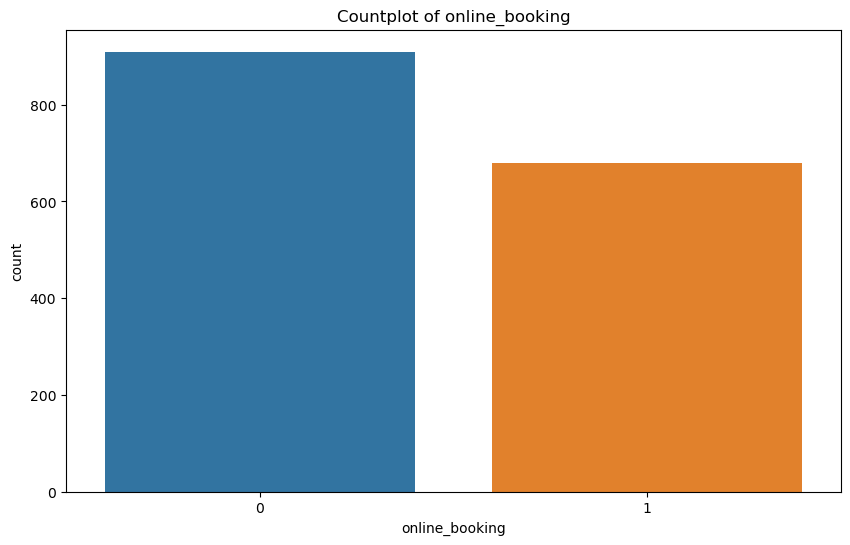

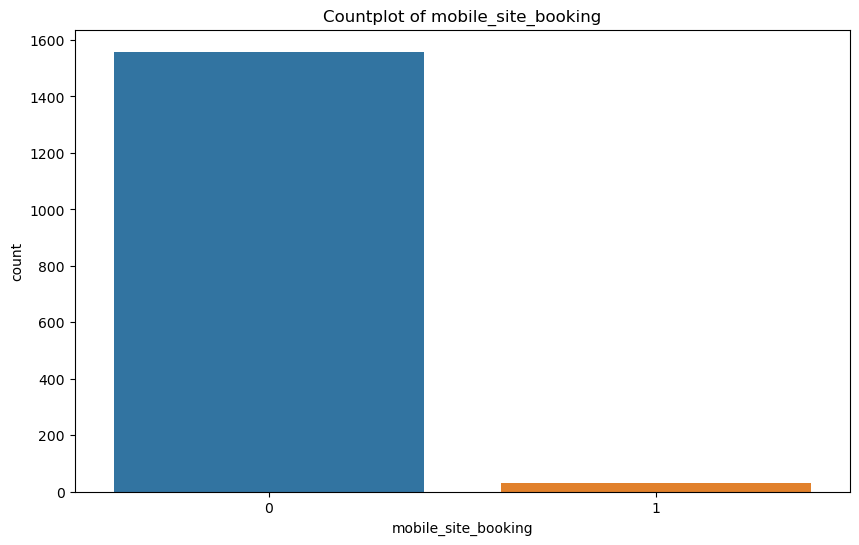

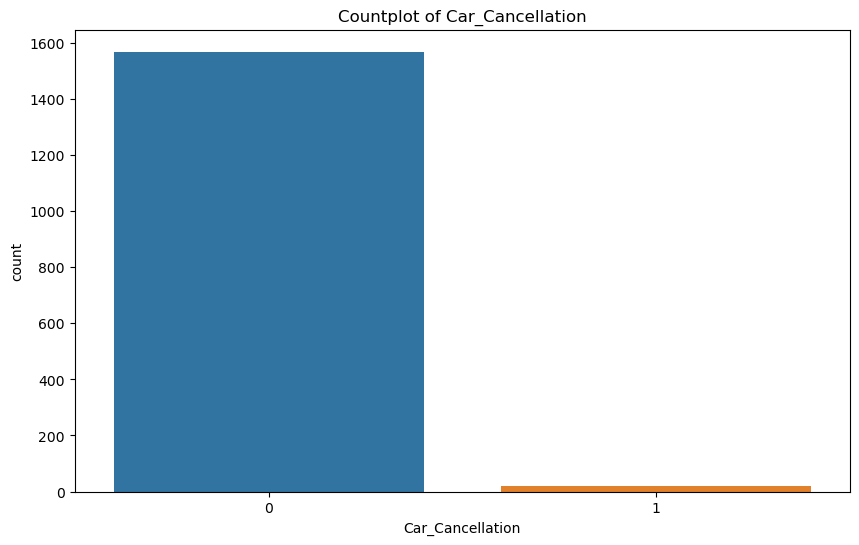

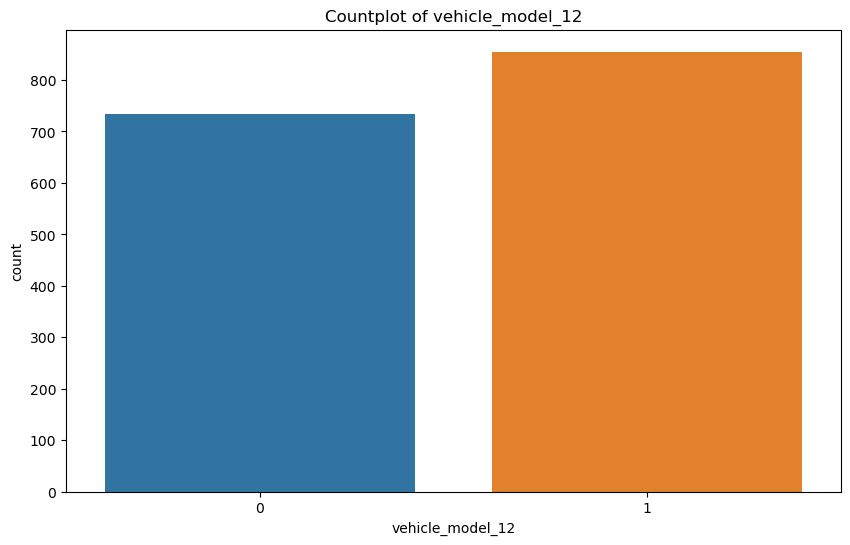

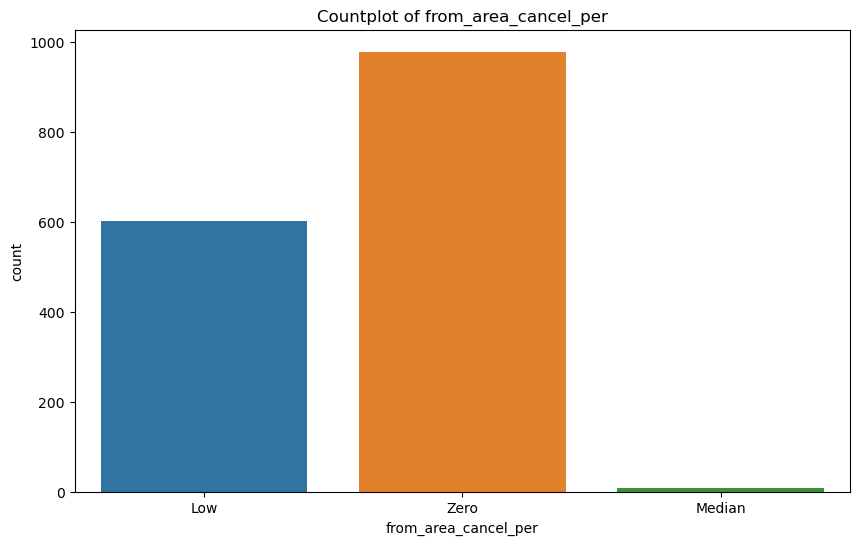

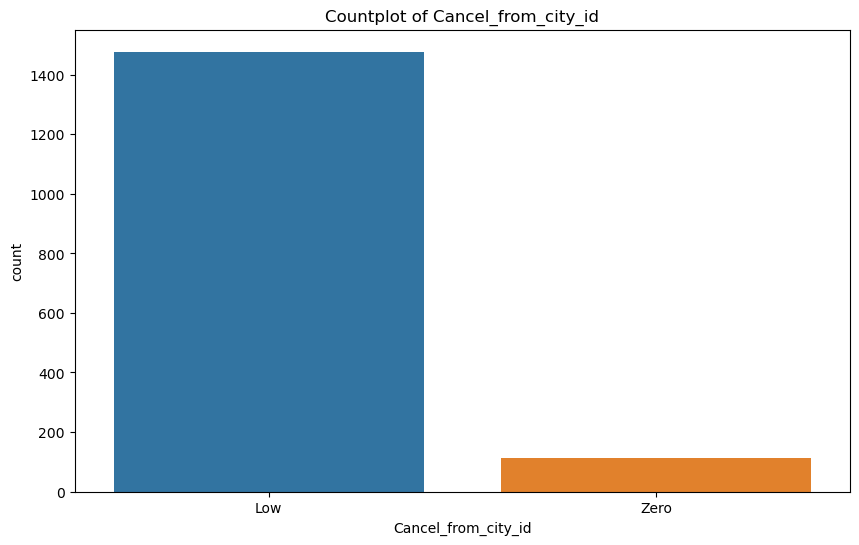

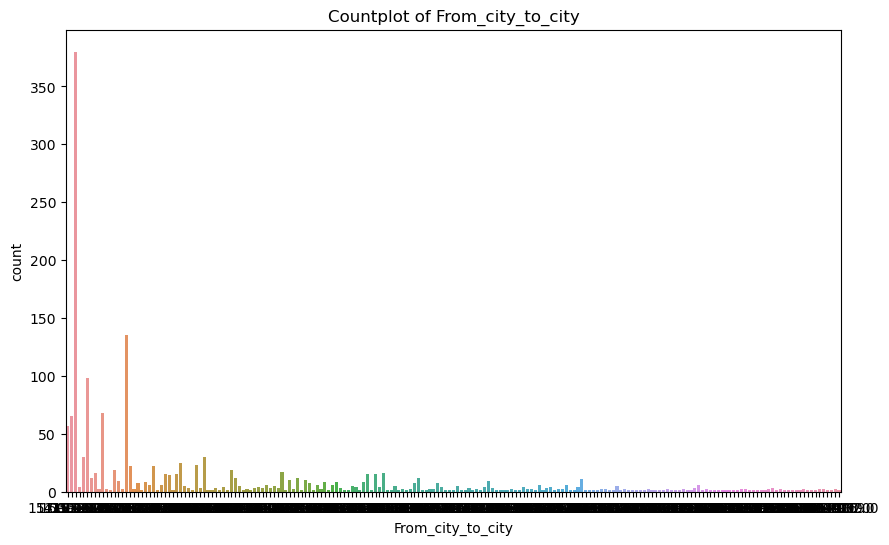

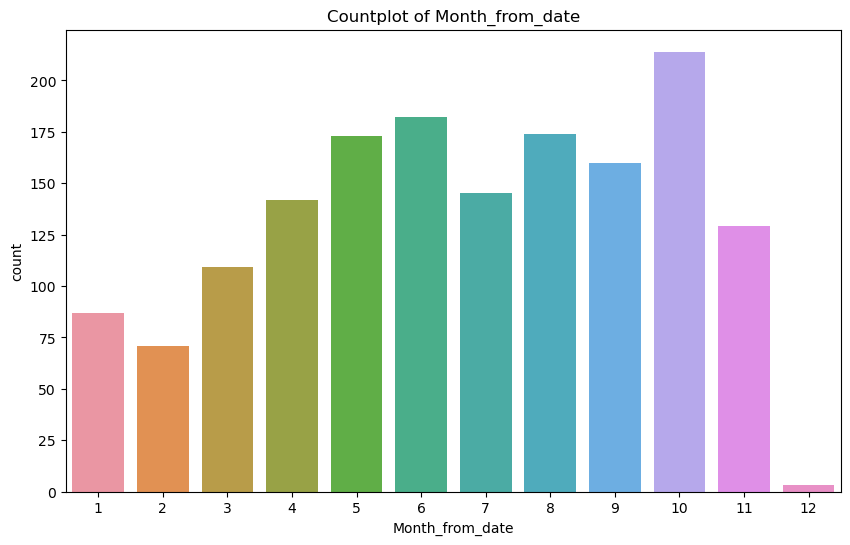

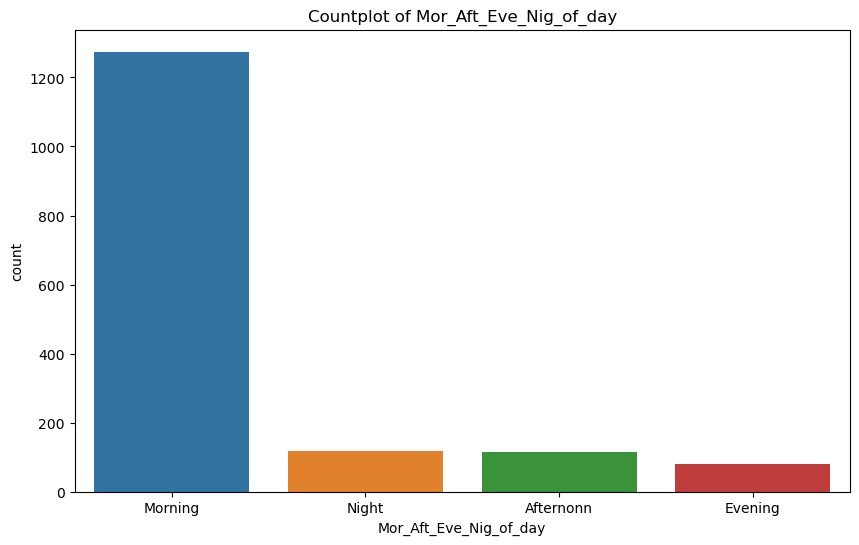

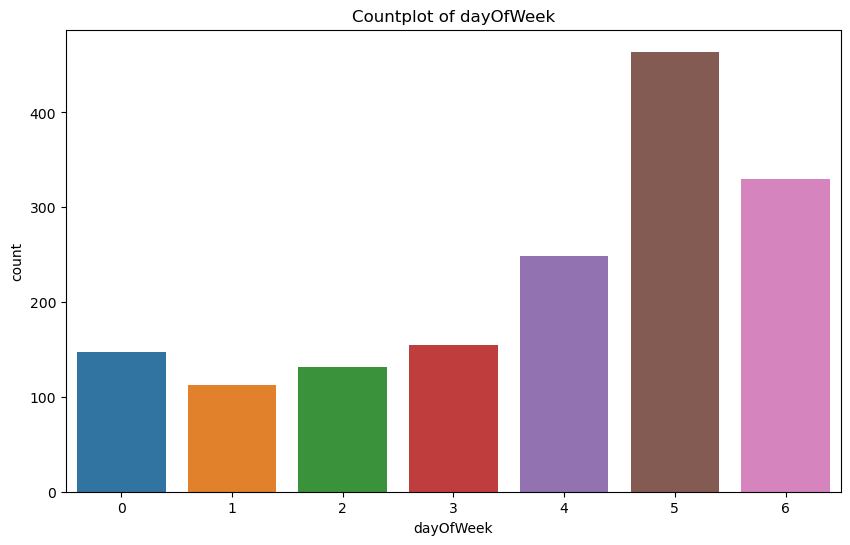

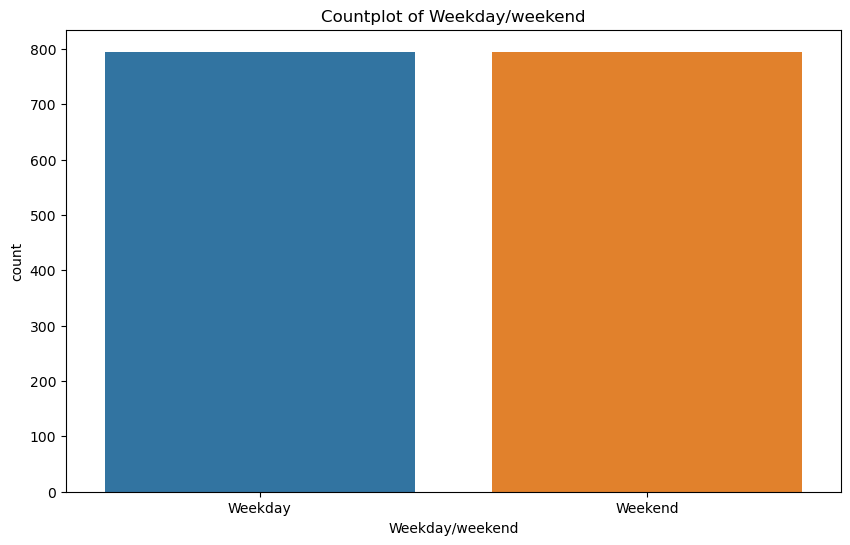

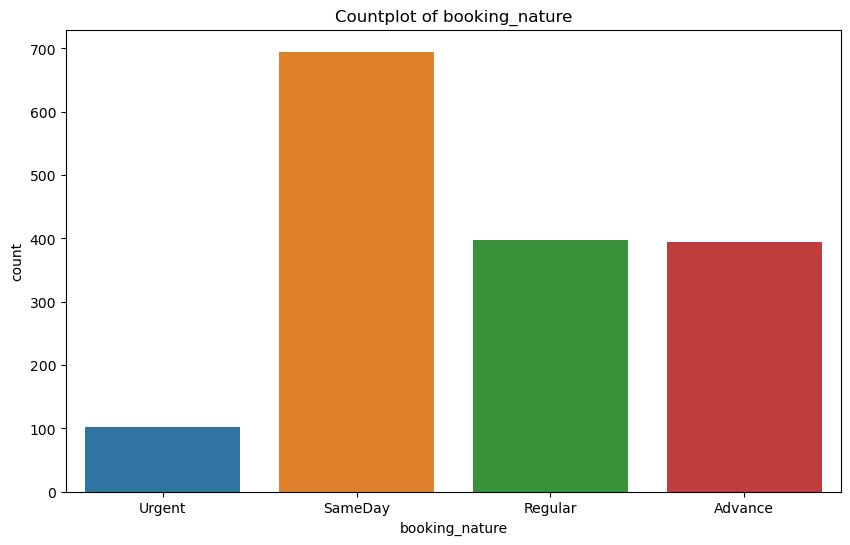

In [126]:
# Countplot
for i in df_tt_1.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df_tt_1[i])
    plt.title('Countplot of {}'.format(i))
    plt.show()

In [127]:
df_tt_1.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'vehicle_model_12', 'from_area_cancel_per', 'Cancel_from_city_id',
       'From_city_to_city', 'Month_from_date', 'Mor_Aft_Eve_Nig_of_day',
       'dayOfWeek', 'Weekday/weekend', 'booking_nature'],
      dtype='object')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

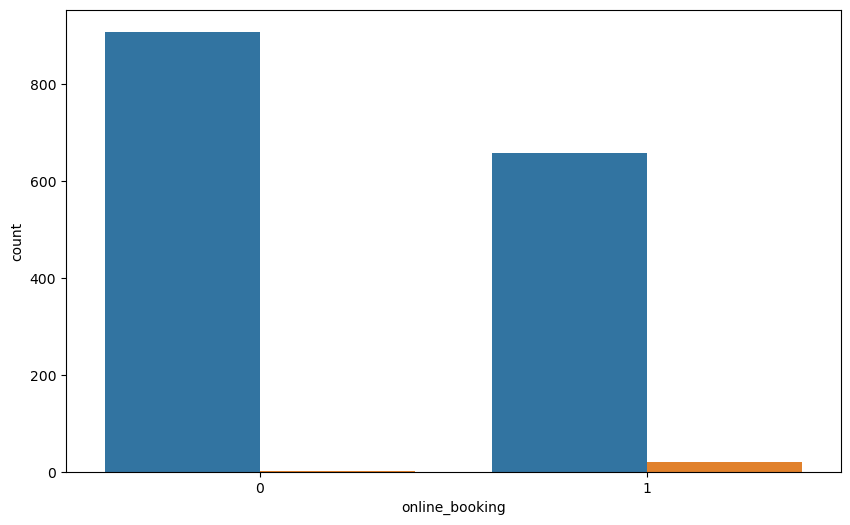

In [42]:
# Countplot Compaire with Car_cancellation
for i in df_tt_1.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_tt_1,x=i,hue='Car_Cancellation')
    plt.title('Countplot of {}'.format(i))
    plt.show()

In [128]:
df_tt_1['booking_nature']=df_tt_1['booking_nature'].astype('object')

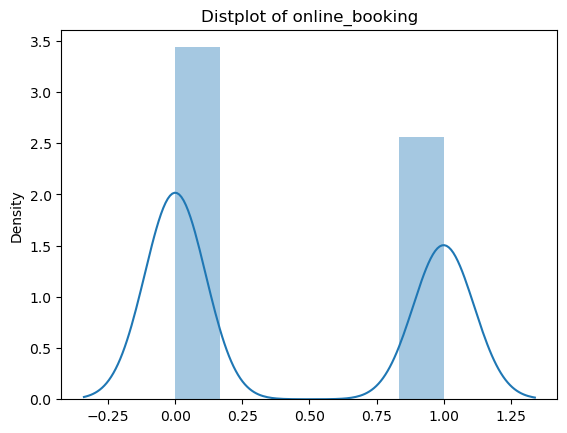

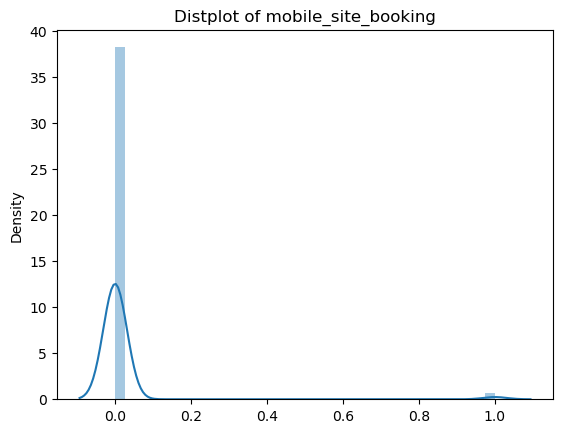

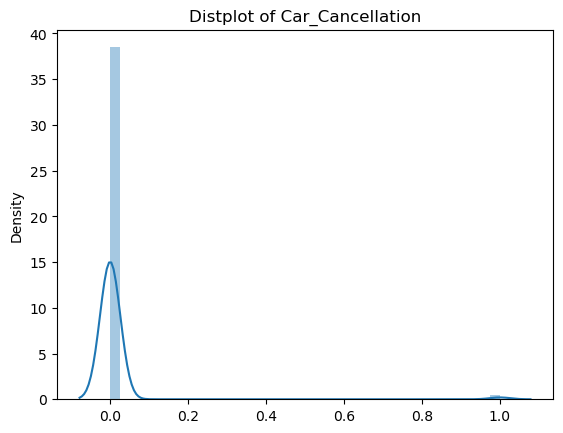

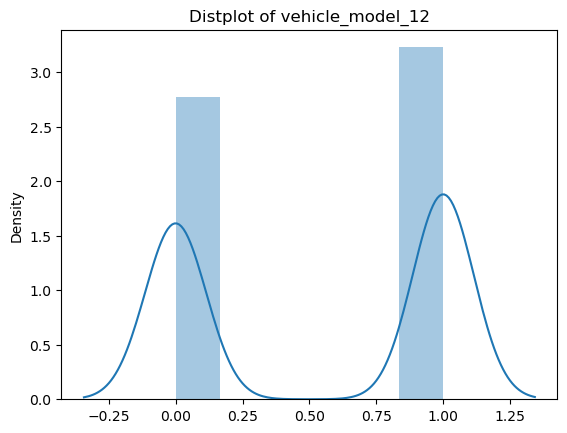

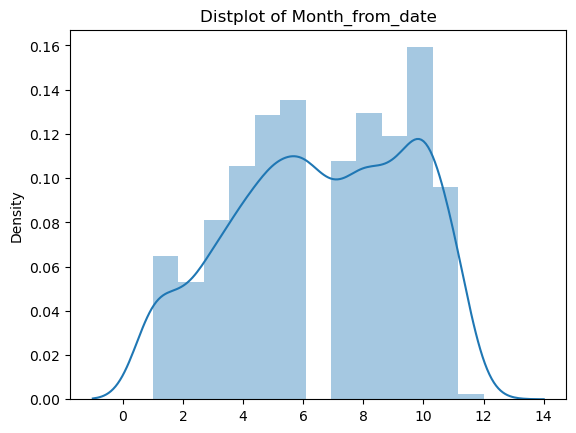

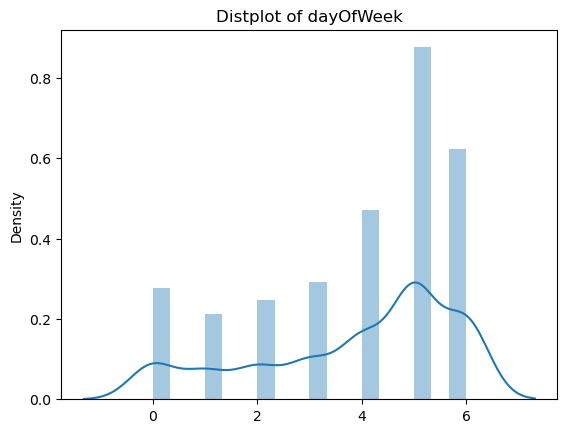

In [129]:
# Plot Destplot
for i in df_tt_1.select_dtypes(exclude='object'):
   sns.distplot(x=df_tt_1[i])
   plt.title('Distplot of {}'.format(i))
   plt.show()


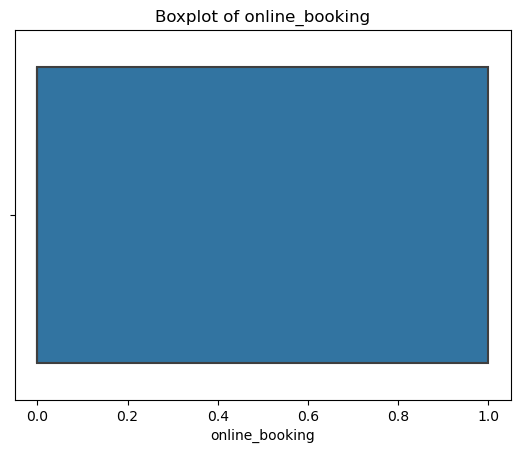

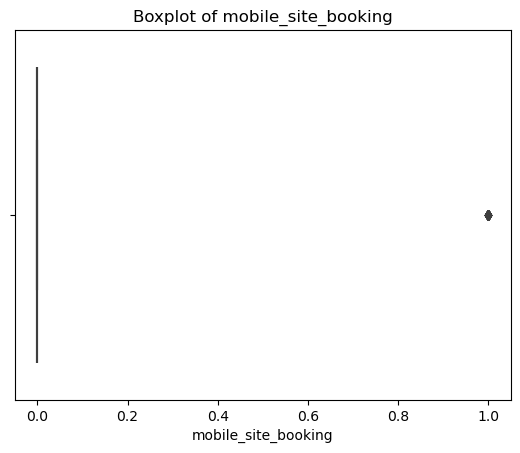

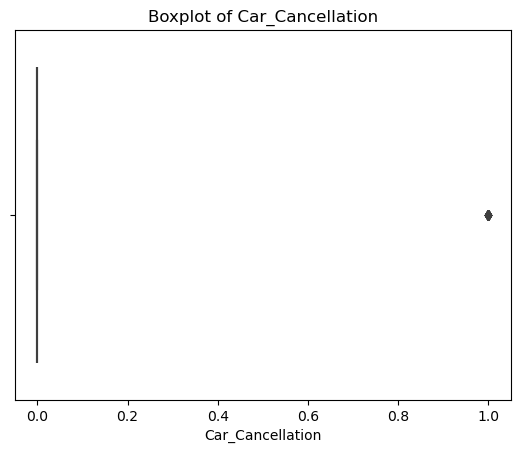

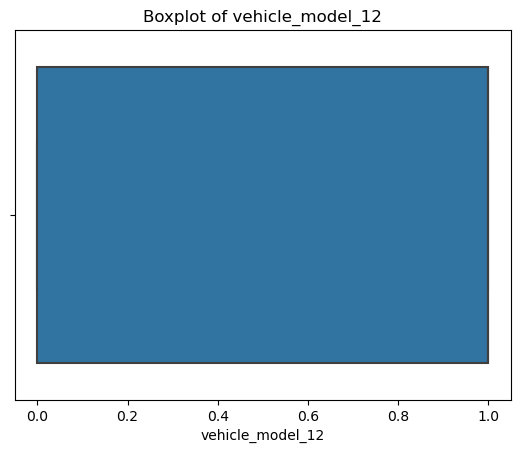

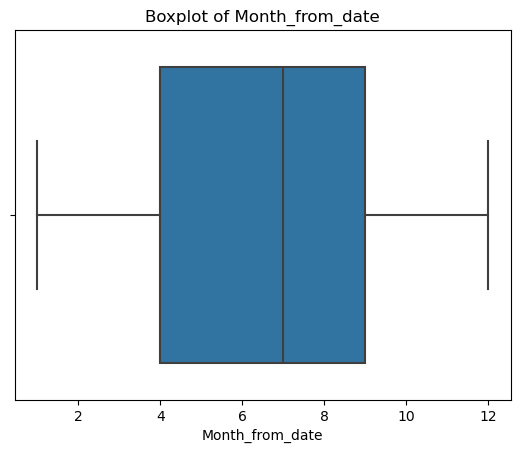

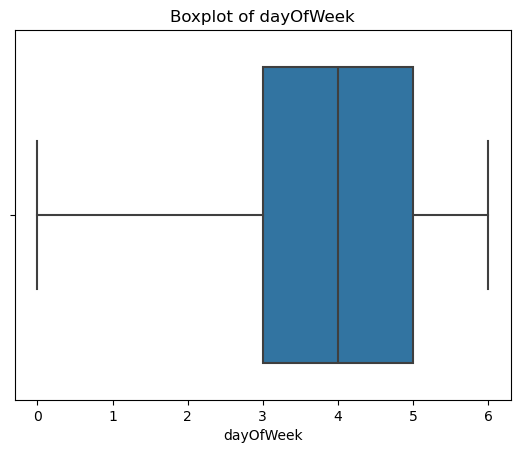

In [130]:
# Boxplot
for i in df_tt_1.select_dtypes(exclude='object'):
  sns.boxplot(x=df_tt_1[i])
  plt.title('Boxplot of {}'.format(i))
  plt.show()

In [131]:
df_tt_1.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'vehicle_model_12', 'from_area_cancel_per', 'Cancel_from_city_id',
       'From_city_to_city', 'Month_from_date', 'Mor_Aft_Eve_Nig_of_day',
       'dayOfWeek', 'Weekday/weekend', 'booking_nature'],
      dtype='object')

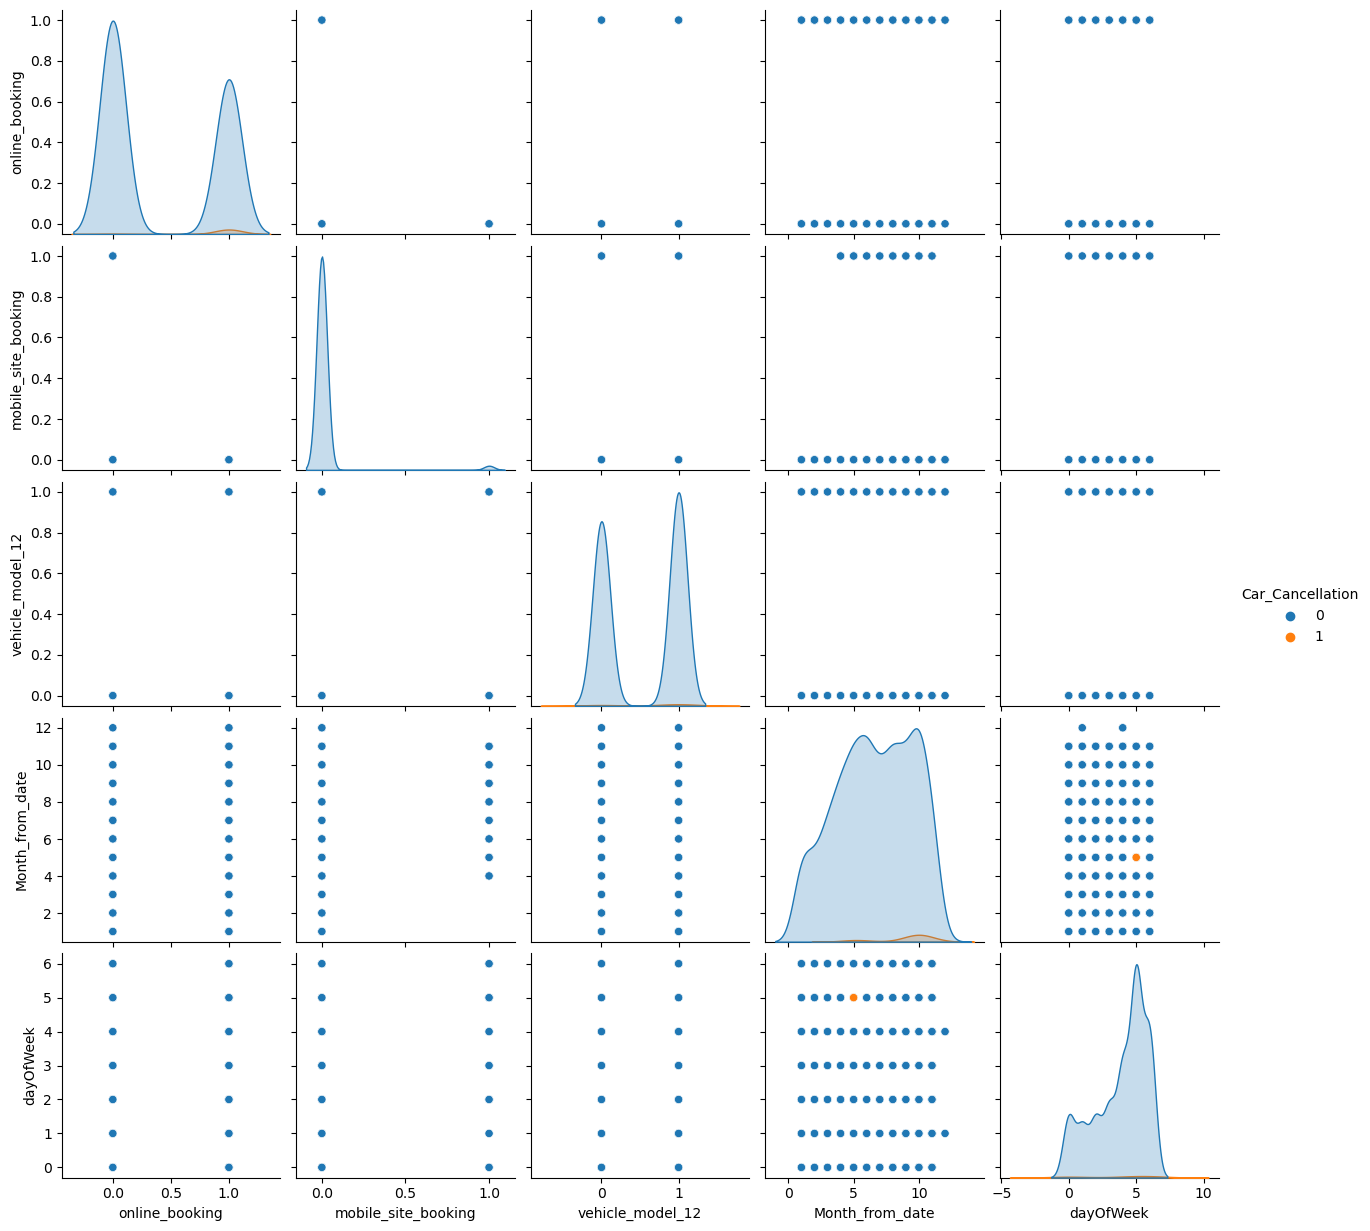

In [132]:
# Checking OurData is Linear
sns.pairplot(data=df_tt_1,hue='Car_Cancellation')

<Axes: >

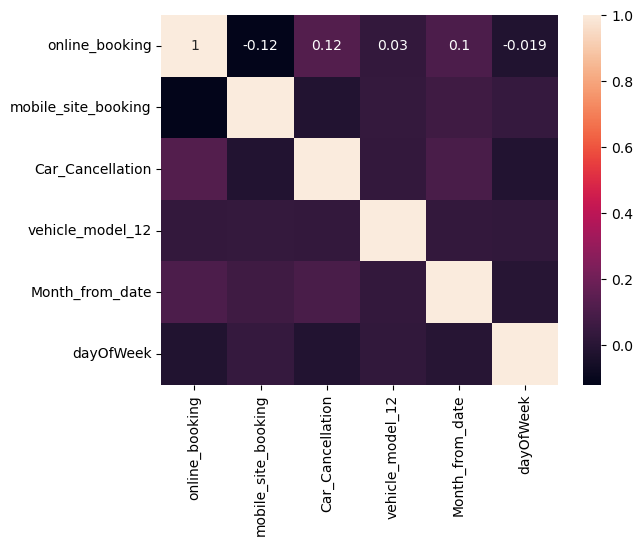

In [133]:
# Checking Correlation
corr=df_tt_1.corr()
sns.heatmap(corr,annot=True)

Online bookings are more likely to be canceled compared to offline bookings.
Bookings made in October have a higher cancellation rate.
Bookings made in the morning have a higher chance of being canceled.
Weekends have a higher likelihood of bookings being canceled.
Same-day bookings experience the highest frequency of cancellations, particularly noticeable in the month of October.

# Feature Eng

In [134]:
df_tt_1.head()

,online_booking,mobile_site_booking,Car_Cancellation,vehicle_model_12,from_area_cancel_per,Cancel_from_city_id,From_city_to_city,Month_from_date,Mor_Aft_Eve_Nig_of_day,dayOfWeek,Weekday/weekend,booking_nature
6,0,0,0,0,Low,Low,15.0--108.0,1,Morning,1,Weekday,Urgent
17,1,0,0,1,Zero,Low,14.0--32.0,1,Morning,5,Weekend,Advance
24,0,0,0,1,Zero,Low,15.0--32.0,1,Morning,5,Weekend,Advance
158,1,0,0,1,Zero,Zero,1.0--152.0,1,Morning,4,Weekday,Regular
216,1,0,0,1,Zero,Low,14.0--32.0,1,Morning,6,Weekend,Advance


In [135]:
from sklearn.preprocessing import OneHotEncoder
df_tt_1=pd.get_dummies(df_tt_1,columns=['booking_nature', 'from_area_cancel_per','From_city_to_city' ,'Mor_Aft_Eve_Nig_of_day','Cancel_from_city_id','Weekday/weekend','booking_nature'],drop_first=True)

In [136]:
df_tt_1.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'vehicle_model_12', 'Month_from_date', 'dayOfWeek',
       'booking_nature_Regular', 'booking_nature_SameDay',
       'booking_nature_Urgent', 'from_area_cancel_per_Median',
       ...
       'From_city_to_city_31.0--29.0', 'From_city_to_city_31.0--44.0',
       'Mor_Aft_Eve_Nig_of_day_Evening', 'Mor_Aft_Eve_Nig_of_day_Morning',
       'Mor_Aft_Eve_Nig_of_day_Night', 'Cancel_from_city_id_Zero',
       'Weekday/weekend_Weekend', 'booking_nature_Regular',
       'booking_nature_SameDay', 'booking_nature_Urgent'],
      dtype='object', length=217)

In [137]:
# Using Label encoding to convert object to int but not use this 
#label=LabelEncoder()
#for i in df_tt_1:
#  df_tt_1[i]=label.fit_transform(df_tt_1[i])
#  df_tt_1

In [138]:
df_tt_1.head()

,online_booking,mobile_site_booking,Car_Cancellation,vehicle_model_12,Month_from_date,dayOfWeek,booking_nature_Regular,booking_nature_SameDay,booking_nature_Urgent,from_area_cancel_per_Median,...,From_city_to_city_31.0--29.0,From_city_to_city_31.0--44.0,Mor_Aft_Eve_Nig_of_day_Evening,Mor_Aft_Eve_Nig_of_day_Morning,Mor_Aft_Eve_Nig_of_day_Night,Cancel_from_city_id_Zero,Weekday/weekend_Weekend,booking_nature_Regular,booking_nature_SameDay,booking_nature_Urgent
6,0,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
17,1,0,0,1,1,5,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
24,0,0,0,1,1,5,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
158,1,0,0,1,1,4,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
216,1,0,0,1,1,6,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [139]:
df_tt_1['Car_Cancellation'].value_counts()

0    1568
1      21
Name: Car_Cancellation, dtype: int64

In [140]:
# Split data
X=df_tt_1.drop('Car_Cancellation',axis=1).values
y=df_tt_1['Car_Cancellation'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100,stratify=y)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1271, 216)
X_test (318, 216)
y_train (1271,)
y_test (318,)


# Model Building

In [141]:
#LogisticRegressionCV

lr=LogisticRegressionCV()
model=lr.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print('Train_accuracy_score',accuracy_score(y_pred_train,y_train))
print('Test_accuracy_score',accuracy_score(y_pred_test,y_test))
print('Train_classification_report',classification_report(y_pred_train,y_train))
print('Test_classification_report',classification_report(y_pred_test,y_test))

Train_accuracy_score 0.9866247049567269
Test_accuracy_score 0.9874213836477987
Train_classification_report               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1271
           1       0.00      0.00      0.00         0

    accuracy                           0.99      1271
   macro avg       0.50      0.49      0.50      1271
weighted avg       1.00      0.99      0.99      1271

Test_classification_report               precision    recall  f1-score   support

           0       1.00      0.99      0.99       318
           1       0.00      0.00      0.00         0

    accuracy                           0.99       318
   macro avg       0.50      0.49      0.50       318
weighted avg       1.00      0.99      0.99       318



In [142]:
#Xgboost

xgb=xgb.XGBClassifier()
model=xgb.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print('Train_accuracy_score',accuracy_score(y_pred_train,y_train))
print('Test_accuracy_score',accuracy_score(y_pred_test,y_test))
print('Train_classification_report',classification_report(y_pred_train,y_train))
print('Test_classification_report',classification_report(y_pred_test,y_test))

Train_accuracy_score 0.994492525570417
Test_accuracy_score 0.9937106918238994
Train_classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1259
           1       0.65      0.92      0.76        12

    accuracy                           0.99      1271
   macro avg       0.82      0.96      0.88      1271
weighted avg       1.00      0.99      0.99      1271

Test_classification_report               precision    recall  f1-score   support

           0       1.00      0.99      1.00       316
           1       0.50      1.00      0.67         2

    accuracy                           0.99       318
   macro avg       0.75      1.00      0.83       318
weighted avg       1.00      0.99      0.99       318



In [143]:
# SVC
svc=SVC()
model=svc.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print('Train_accuracy_score',accuracy_score(y_pred_train,y_train))
print('Test_accuracy_score',accuracy_score(y_pred_test,y_test))
print('Train_classification_report',classification_report(y_pred_train,y_train))
print('Test_classification_report',classification_report(y_pred_test,y_test))

Train_accuracy_score 0.9866247049567269
Test_accuracy_score 0.9874213836477987
Train_classification_report               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1271
           1       0.00      0.00      0.00         0

    accuracy                           0.99      1271
   macro avg       0.50      0.49      0.50      1271
weighted avg       1.00      0.99      0.99      1271

Test_classification_report               precision    recall  f1-score   support

           0       1.00      0.99      0.99       318
           1       0.00      0.00      0.00         0

    accuracy                           0.99       318
   macro avg       0.50      0.49      0.50       318
weighted avg       1.00      0.99      0.99       318



In [144]:
# KNeighborsClassifier

Knn=KNeighborsClassifier()
model=Knn.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print('Train_accuracy_score',accuracy_score(y_pred_train,y_train))
print('Test_accuracy_score',accuracy_score(y_pred_test,y_test))
print('Train_classification_report',classification_report(y_pred_train,y_train))
print('Test_classification_report',classification_report(y_pred_test,y_test))

Train_accuracy_score 0.988198269079465
Test_accuracy_score 0.9937106918238994
Train_classification_report               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1267
           1       0.18      0.75      0.29         4

    accuracy                           0.99      1271
   macro avg       0.59      0.87      0.64      1271
weighted avg       1.00      0.99      0.99      1271

Test_classification_report               precision    recall  f1-score   support

           0       1.00      0.99      1.00       316
           1       0.50      1.00      0.67         2

    accuracy                           0.99       318
   macro avg       0.75      1.00      0.83       318
weighted avg       1.00      0.99      0.99       318



In [145]:
df_tt_1.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'vehicle_model_12', 'Month_from_date', 'dayOfWeek',
       'booking_nature_Regular', 'booking_nature_SameDay',
       'booking_nature_Urgent', 'from_area_cancel_per_Median',
       ...
       'From_city_to_city_31.0--29.0', 'From_city_to_city_31.0--44.0',
       'Mor_Aft_Eve_Nig_of_day_Evening', 'Mor_Aft_Eve_Nig_of_day_Morning',
       'Mor_Aft_Eve_Nig_of_day_Night', 'Cancel_from_city_id_Zero',
       'Weekday/weekend_Weekend', 'booking_nature_Regular',
       'booking_nature_SameDay', 'booking_nature_Urgent'],
      dtype='object', length=217)

In [146]:
# DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model=dtc.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print('Train_accuracy_score',accuracy_score(y_pred_train,y_train))
print('Test_accuracy_score',accuracy_score(y_pred_test,y_test))
print('Train_classification_report',classification_report(y_pred_train,y_train))
print('Test_classification_report',classification_report(y_pred_test,y_test))

Train_accuracy_score 0.998426435877262
Test_accuracy_score 0.9905660377358491
Train_classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1256
           1       0.88      1.00      0.94        15

    accuracy                           1.00      1271
   macro avg       0.94      1.00      0.97      1271
weighted avg       1.00      1.00      1.00      1271

Test_classification_report               precision    recall  f1-score   support

           0       1.00      0.99      1.00       317
           1       0.25      1.00      0.40         1

    accuracy                           0.99       318
   macro avg       0.62      1.00      0.70       318
weighted avg       1.00      0.99      0.99       318



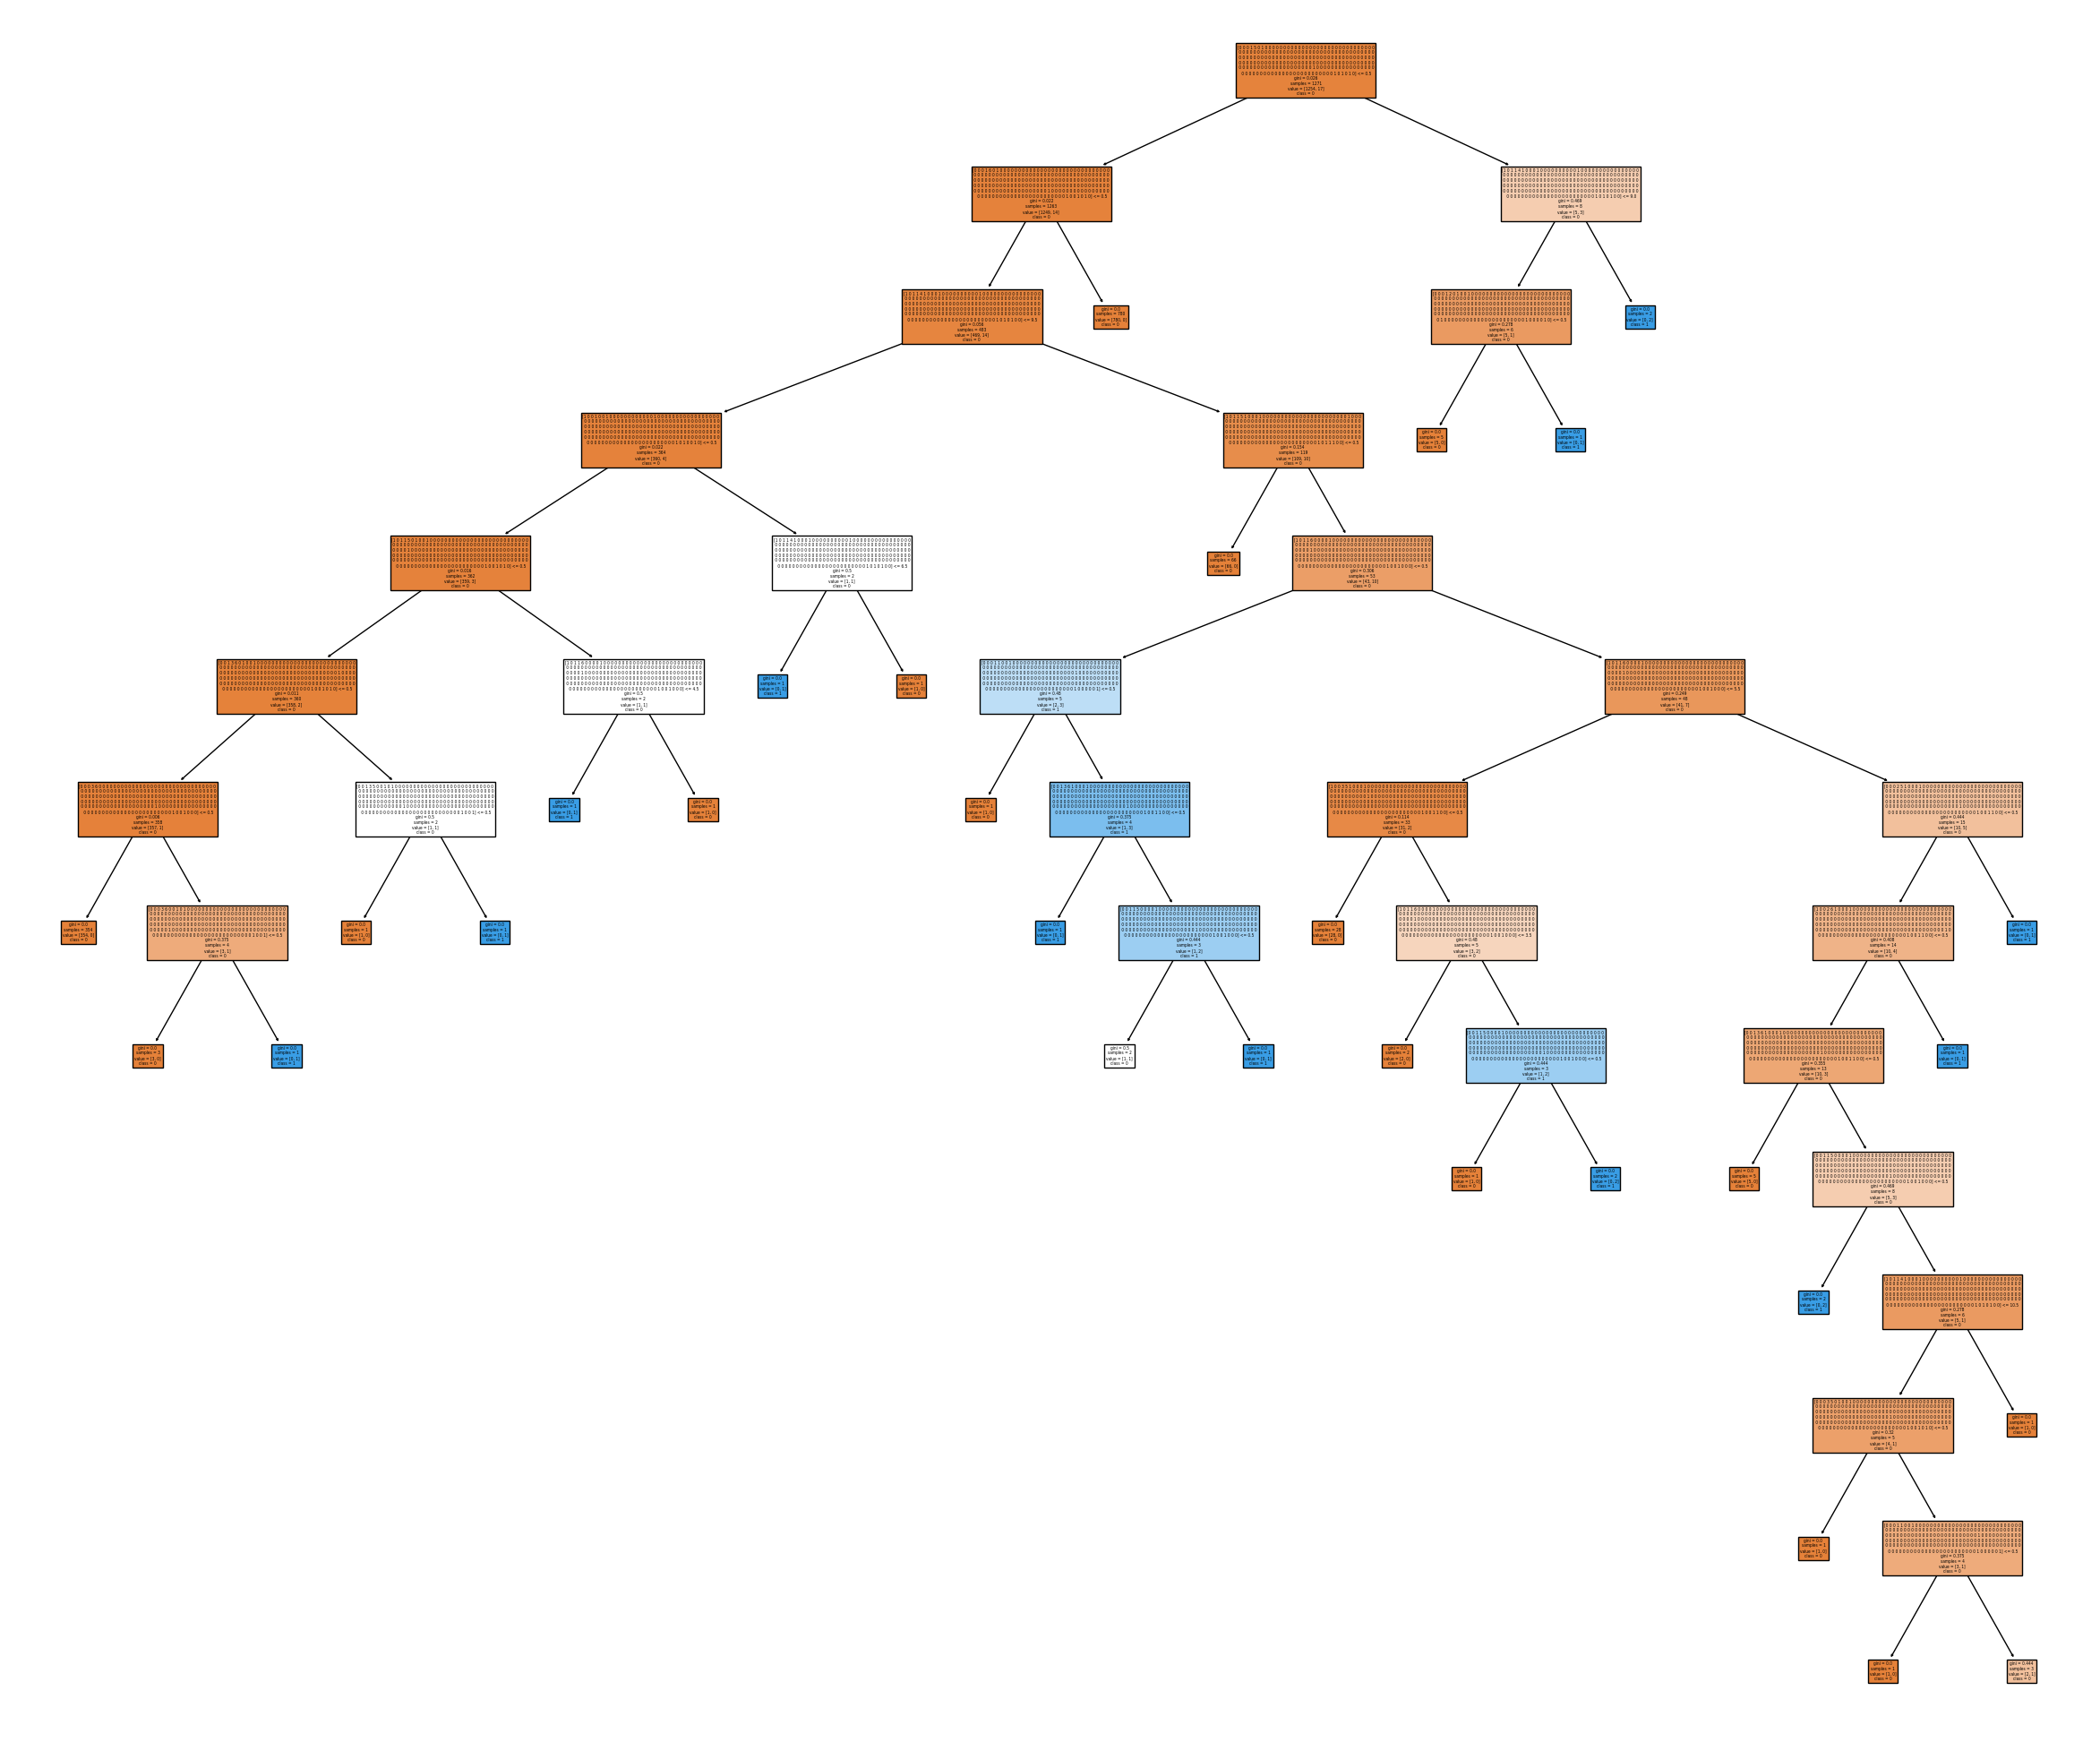

In [147]:
plt.rcParams['font.size'] = 10
plt.figure(figsize=(30, 25))
plot_tree(model, filled=True, feature_names=X, class_names=['0', '1'])
plt.show()

In [148]:
# RandomForestClassifier

rfc=RandomForestClassifier()
model=rfc.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print('Train_accuracy_score',accuracy_score(y_pred_train,y_train))
print('Test_accuracy_score',accuracy_score(y_pred_test,y_test))
print('Train_classification_report',classification_report(y_pred_train,y_train))
print('Test_classification_report',classification_report(y_pred_test,y_test))

Train_accuracy_score 0.998426435877262
Test_accuracy_score 0.9905660377358491
Train_classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       0.94      0.94      0.94        17

    accuracy                           1.00      1271
   macro avg       0.97      0.97      0.97      1271
weighted avg       1.00      1.00      1.00      1271

Test_classification_report               precision    recall  f1-score   support

           0       1.00      0.99      1.00       317
           1       0.25      1.00      0.40         1

    accuracy                           0.99       318
   macro avg       0.62      1.00      0.70       318
weighted avg       1.00      0.99      0.99       318



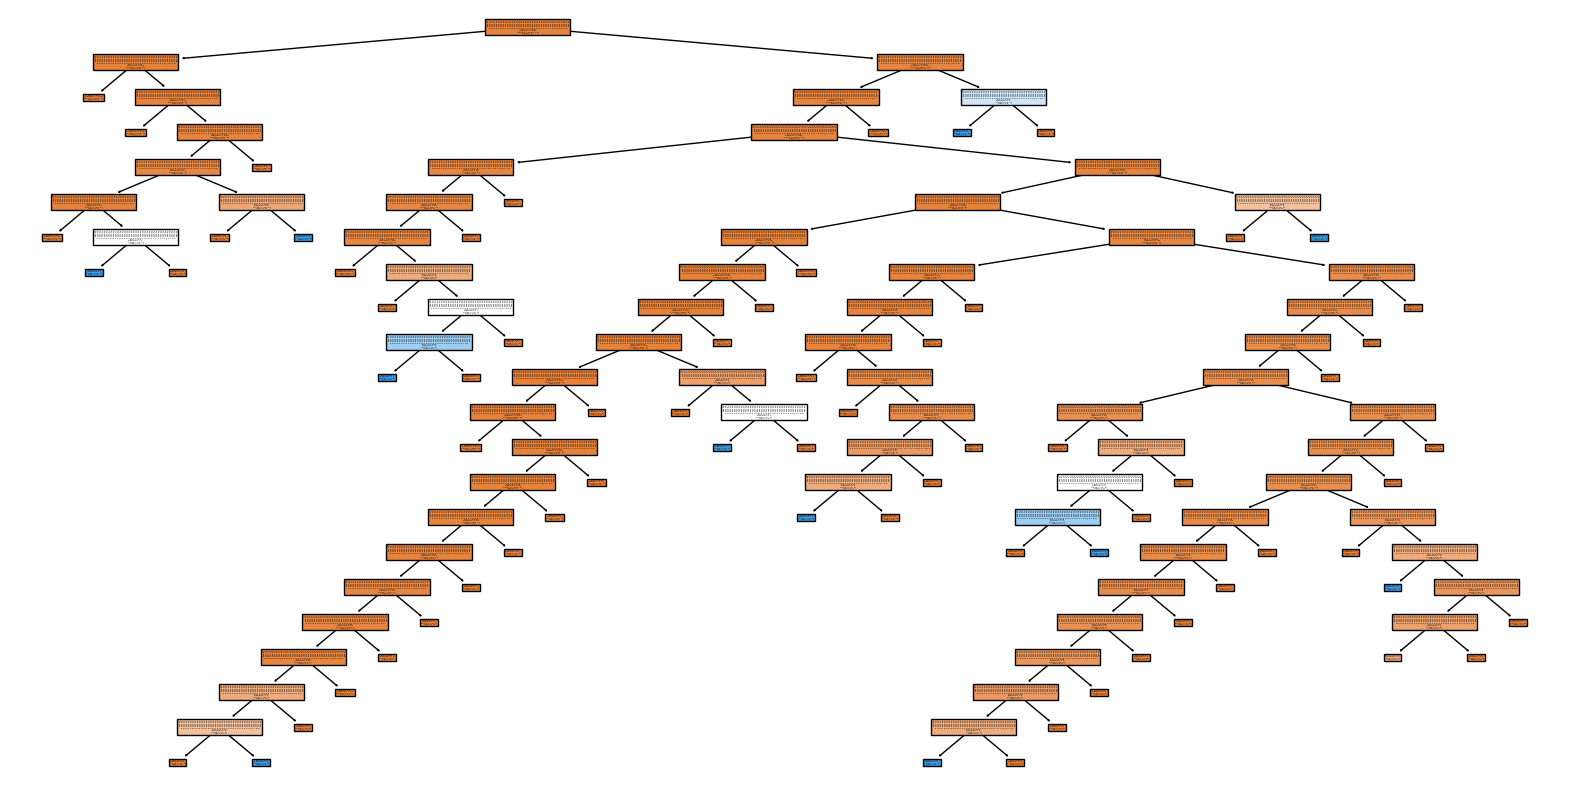

In [149]:
estimator = model.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, feature_names=X, class_names=['0', '1'])
plt.show()

In [150]:
# Naive_Byes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
model=nb_model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print('Train_accuracy_score',accuracy_score(y_pred_train,y_train))
print('Test_accuracy_score',accuracy_score(y_pred_test,y_test))
print('Train_classification_report',classification_report(y_pred_train,y_train))
print('Test_classification_report',classification_report(y_pred_test,y_test))

Train_accuracy_score 0.8638867033831629
Test_accuracy_score 0.8301886792452831
Train_classification_report               precision    recall  f1-score   support

           0       0.86      1.00      0.93      1081
           1       1.00      0.09      0.16       190

    accuracy                           0.86      1271
   macro avg       0.93      0.54      0.55      1271
weighted avg       0.88      0.86      0.81      1271

Test_classification_report               precision    recall  f1-score   support

           0       0.83      1.00      0.91       262
           1       0.75      0.05      0.10        56

    accuracy                           0.83       318
   macro avg       0.79      0.52      0.50       318
weighted avg       0.82      0.83      0.76       318



Logistic Regression CV:
Test Accuracy: 0.987
Precision, recall, and F1-score for class 1 are 0, indicating an inability to predict this class.

XGBoost:
Test Accuracy: 0.991
Better performance than Logistic Regression CV, with reasonable precision, recall, and F1-score for both classes.

Support Vector Classifier (SVC):
Test Accuracy: 0.987
Similar performance to Logistic Regression CV, with precision, recall, and F1-score for class 1 being 0.

K Nearest Neighbors (KNN):
Test Accuracy: 0.955
Lower accuracy compared to other models, and precision, recall, and F1-score for class 1 are 0.

Decision Tree Classifier:
Test Accuracy: 0.987
Similar performance to XGBoost, but precision, recall, and F1-score for class 1 are relatively low.

Random Forest Classifier:
Test Accuracy: 0.991
Similar performance to XGBoost, with reasonable precision, recall, and F1-score for both classes.

Based on these observations, the XGBoost and Random Forest Classifier models seem to perform the best. They have the highest accuracy and better precision, recall, and F1-score for both classes compared to other models. Therefore, either of these models could be considered as the best choice, depending on other factors such as computational efficiency, interpretability, and specific requirements of your problem.

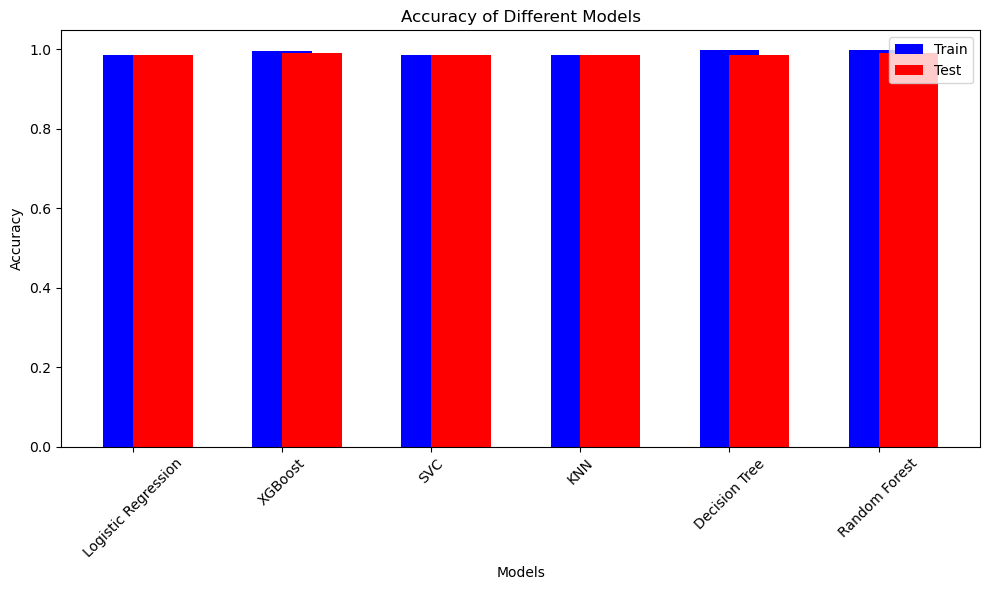

In [151]:
# Define model names and their accuracy scores
models = ['Logistic Regression', 'XGBoost', 'SVC', 'KNN', 'Decision Tree', 'Random Forest']
train_accuracy = [0.986, 0.995, 0.986, 0.986, 0.998, 0.998]
test_accuracy = [0.987, 0.990, 0.987, 0.987, 0.987, 0.990]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, train_accuracy, width=0.4, label='Train', color='b', align='center')
plt.bar(x, test_accuracy, width=0.4, label='Test', color='r', align='edge')

# Customizing the plot
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(x, models, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Building 2 Model based on Travel Type

In [152]:
df_tt_2.head()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [153]:
# checking null value
df_tt_2.isnull().sum()*100/len(df_tt_2)

id                       0.000000
user_id                  0.000000
vehicle_model_id         0.000000
travel_type_id           0.000000
package_id             100.000000
from_area_id             0.000000
to_area_id               0.000000
from_city_id            57.704421
to_city_id             100.000000
from_date                0.000000
online_booking           0.000000
mobile_site_booking      0.000000
booking_created          0.000000
from_lat                 0.000000
from_long                0.000000
to_lat                   0.000000
to_long                  0.000000
Car_Cancellation         0.000000
dtype: float64

In [154]:
# droping Null  columns
df_tt_2.drop(['id','user_id','package_id'],inplace=True,axis=1)

In [155]:
# from_area_id,to_area_id - Make a column for intra-city routes - from_area_id -> to_area_id
#- transform into cancellation volume i.e. Zero, High, Medium or Low cancellation routes
df_tt_2['intra_city_routes']=df_tt_2.groupby(['from_area_id','to_area_id'])['Car_Cancellation'].transform('mean')
df_tt_2['intra_city_routes'].value_counts()

# assign Low,Median, Zero and High cancellation
df_tt_2['Cancel_perc_intra_city_routes']=np.where(df_tt_2['intra_city_routes']==0,'Zero',np.where(df_tt_2['intra_city_routes']>0.7,'High',
                                                                                                np.where(df_tt_2['intra_city_routes'].between(.31,.69),'Median','Low')))
df_tt_2['Cancel_perc_intra_city_routes'].value_counts()

Zero      20786
Low       10809
Median     1473
High       1224
Name: Cancel_perc_intra_city_routes, dtype: int64

In [156]:
df_tt_2.isnull().sum()*100/len(df_tt_2)

vehicle_model_id                   0.000000
travel_type_id                     0.000000
from_area_id                       0.000000
to_area_id                         0.000000
from_city_id                      57.704421
to_city_id                       100.000000
from_date                          0.000000
online_booking                     0.000000
mobile_site_booking                0.000000
booking_created                    0.000000
from_lat                           0.000000
from_long                          0.000000
to_lat                             0.000000
to_long                            0.000000
Car_Cancellation                   0.000000
intra_city_routes                  0.000000
Cancel_perc_intra_city_routes      0.000000
dtype: float64

In [157]:
df_tt_2.drop(['from_city_id','to_city_id'],inplace=True,axis=1)

In [158]:
# from_date - transform into - dayOfWeek, Month, Weekday/weekend, TimeofDay(Hour | Morning Afternoon Evening Night)
df_tt_2['from_date']=pd.to_datetime(df_tt_2['from_date'])
df_tt_2['Month_from_data']=df_tt_2['from_date'].dt.month # Month
df_tt_2['Day_of_week_from_data']=df_tt_2['from_date'].dt.dayofweek # day of week
df_tt_2['Weekday/weekend'] = np.where(df_tt_2['Day_of_week_from_data'].isin([5, 6]), 'Weekend', 'Weekday')
df_tt_2['TimeofDay'] = pd.cut(df_tt_2['from_date'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

In [159]:
df_tt_2['booking_created']=pd.to_datetime(df_tt_2['booking_created'])

In [160]:
df_tt_2['time_diff'] = (df_tt_2['from_date'] - df_tt_2['booking_created']).dt.total_seconds()/3600

In [161]:
df_tt_2['time_diff'].value_counts()

1.533333      120
1.500000      119
1.516667      108
1.583333      107
1.550000      104
             ... 
453.016667      1
477.016667      1
549.000000      1
573.000000      1
408.450000      1
Name: time_diff, Length: 6386, dtype: int64

In [162]:
df_tt_2['booking_nature'] = pd.cut(df_tt_2['time_diff'], bins=[-8,2,17,45,1500],labels=['Urgent','SameDay','Regular','Advance'])

In [163]:
df_tt_2['booking_nature'].value_counts()

SameDay    18932
Urgent      5763
Regular     5107
Advance     4485
Name: booking_nature, dtype: int64

In [164]:
df_tt_2.head(1)

,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,...,to_long,Car_Cancellation,intra_city_routes,Cancel_perc_intra_city_routes,Month_from_data,Day_of_week_from_data,Weekday/weekend,TimeofDay,time_diff,booking_nature
0,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.92415,77.67229,...,77.63575,0,0.0,Zero,1,1,Weekday,Night,0.35,Urgent


In [165]:
df_tt_2.drop(['from_date','booking_created','from_lat','from_long','to_long','travel_type_id','from_area_id','to_area_id','to_lat','time_diff'],inplace=True,axis=1)

In [166]:
df_tt_2.head()

,vehicle_model_id,online_booking,mobile_site_booking,Car_Cancellation,intra_city_routes,Cancel_perc_intra_city_routes,Month_from_data,Day_of_week_from_data,Weekday/weekend,TimeofDay,booking_nature
0,28,0,0,0,0.0,Zero,1,1,Weekday,Night,Urgent
1,12,0,0,0,0.0,Zero,1,1,Weekday,Morning,SameDay
2,12,0,0,0,0.0,Zero,1,1,Weekday,Night,Urgent
3,12,0,0,0,0.0,Zero,1,1,Weekday,Night,Urgent
4,12,0,0,0,0.0,Zero,1,1,Weekday,Morning,Urgent


# EDA

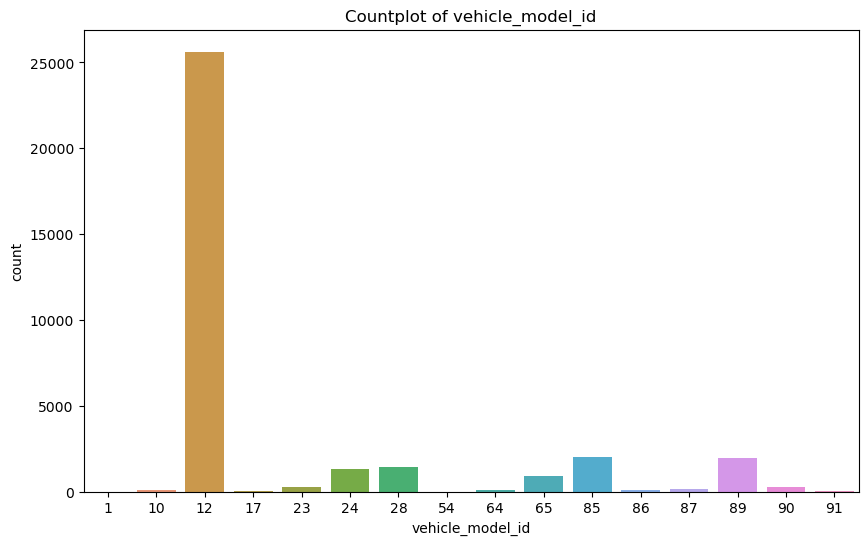

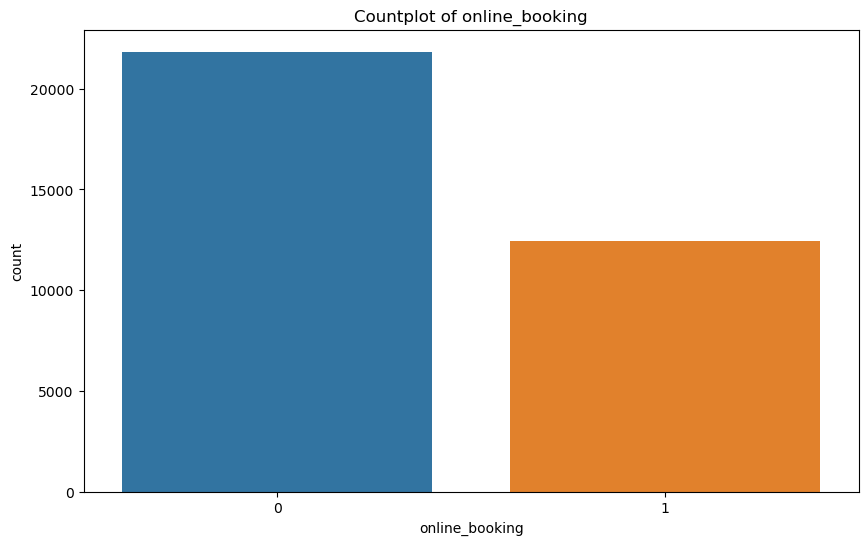

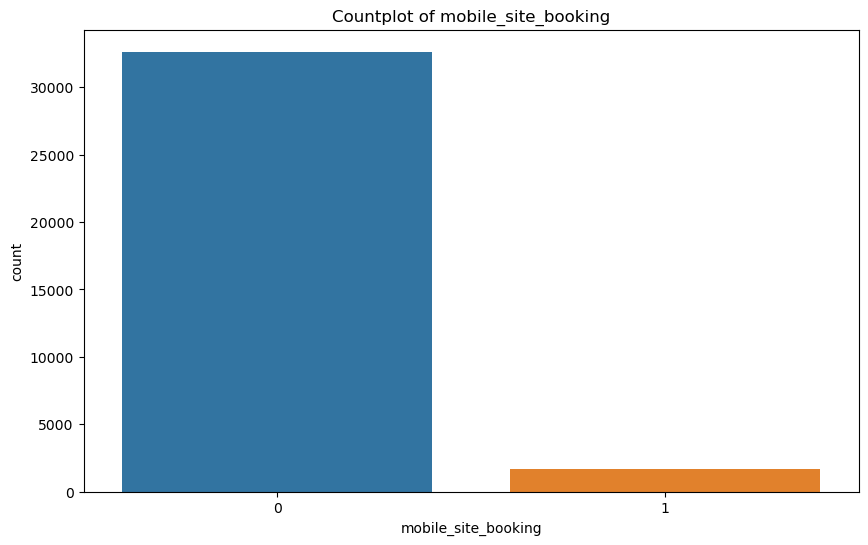

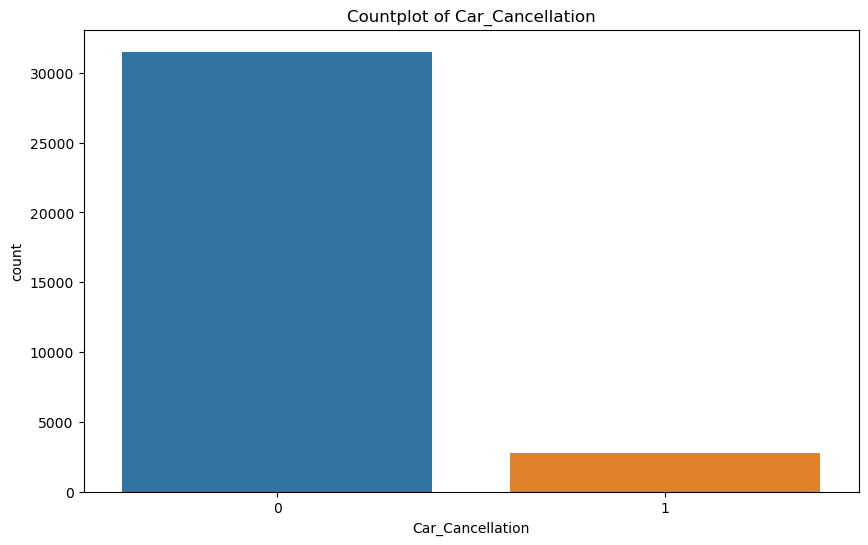

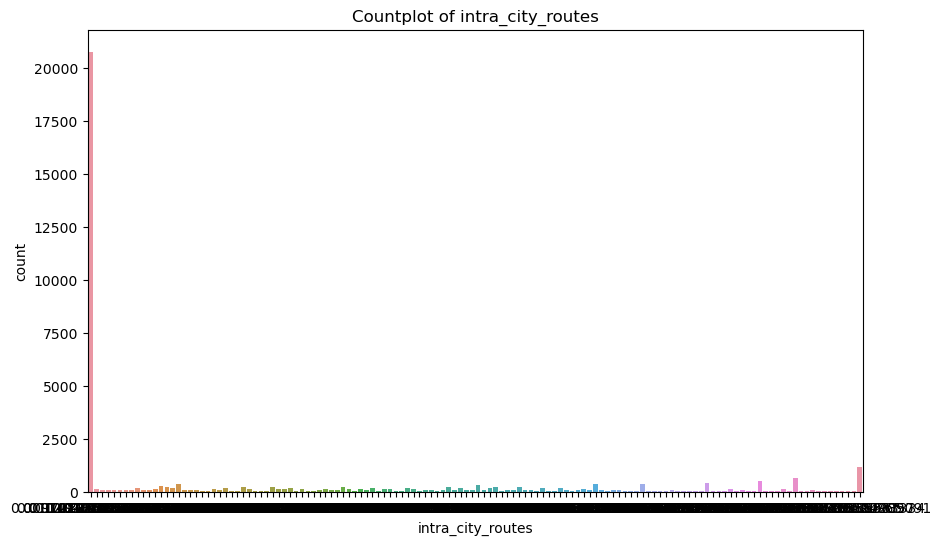

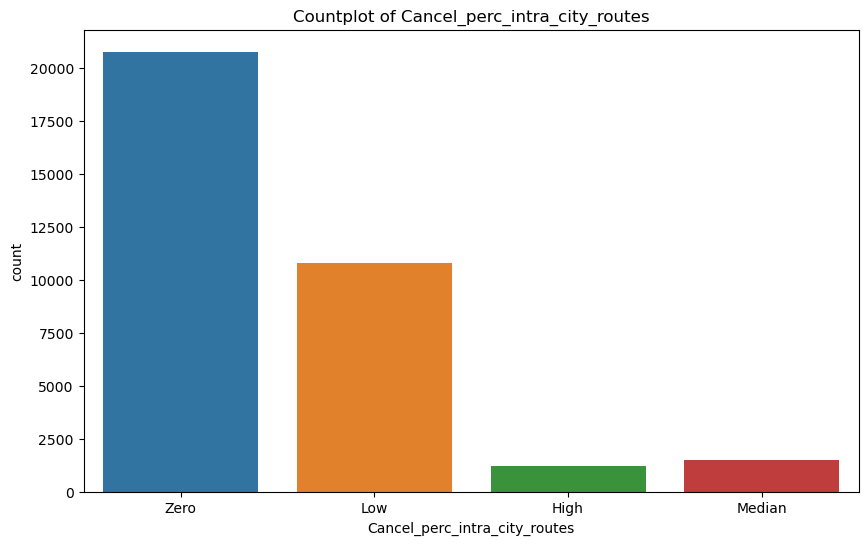

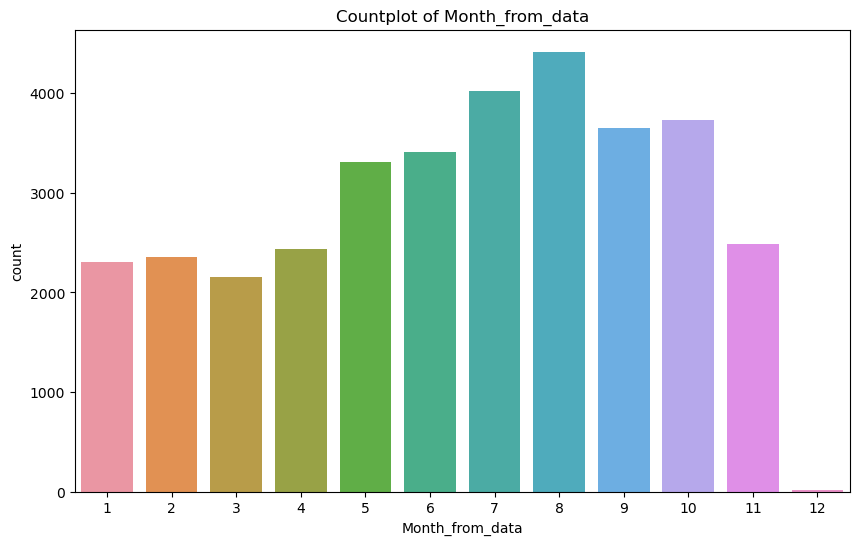

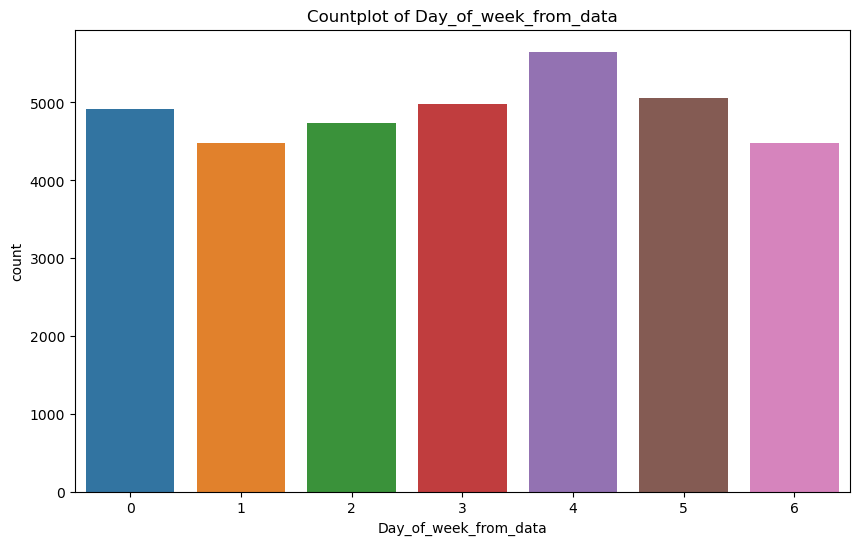

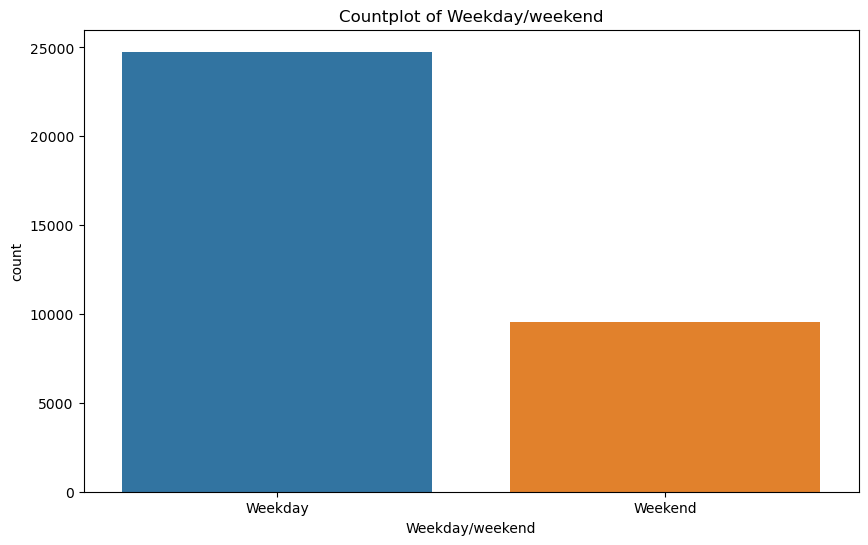

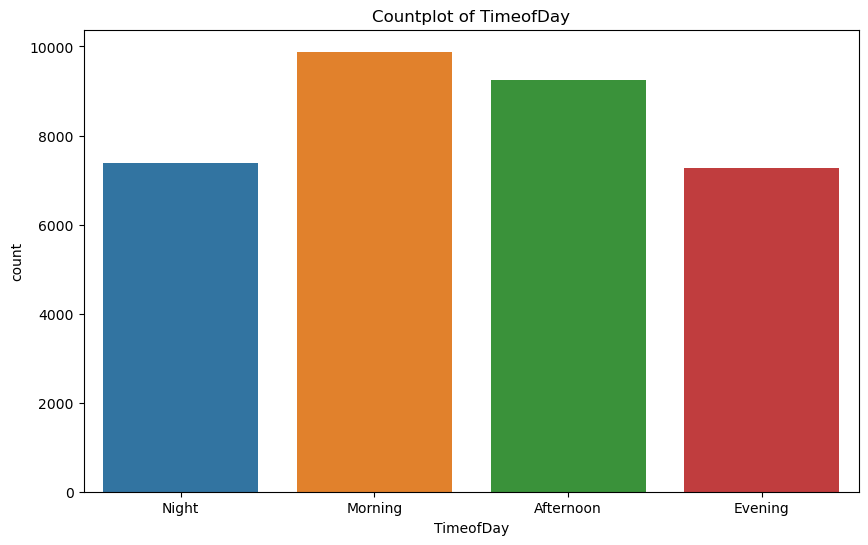

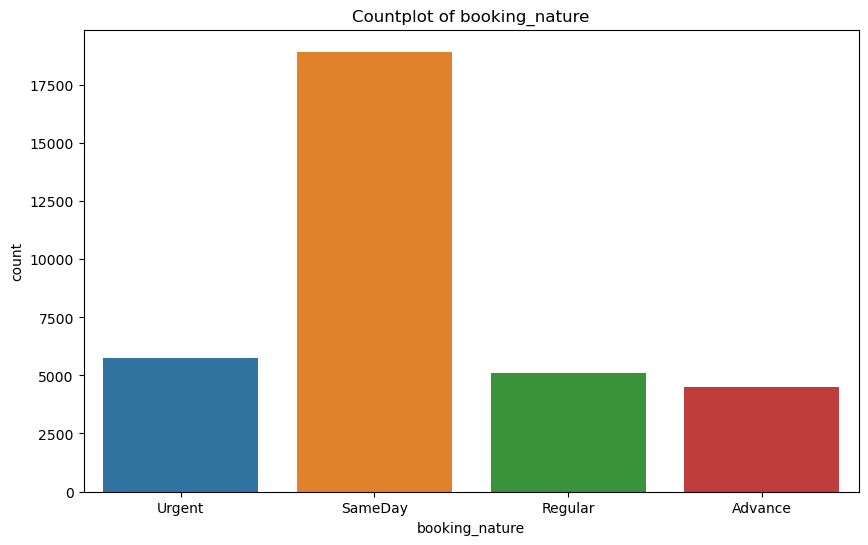

In [167]:
# Countplot
for i in df_tt_2.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df_tt_2[i])
    plt.title('Countplot of {}'.format(i))
    plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

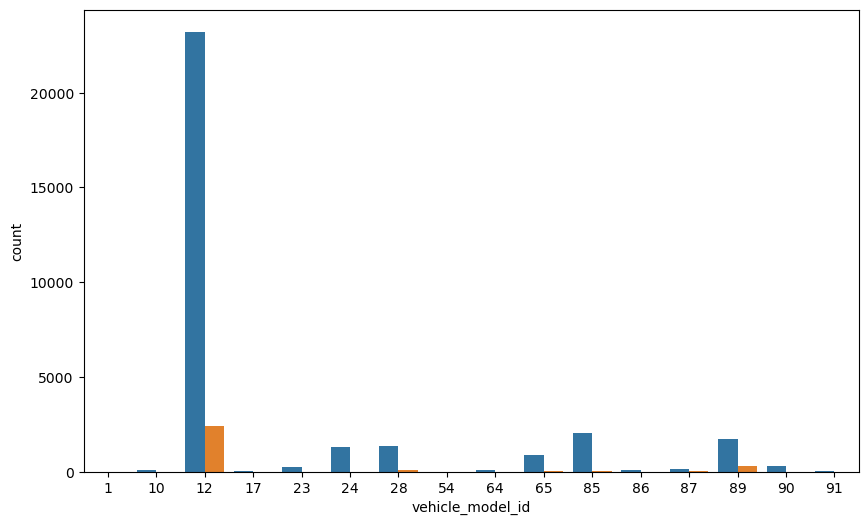

In [82]:
# Countplot Compaire with Car_cancellation
for i in df_tt_2.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_tt_2,x=i,hue='Car_Cancellation')
    plt.title('Countplot of {}'.format(i))
    plt.show()

In [168]:
df_tt_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   vehicle_model_id               34292 non-null  int64   
 1   online_booking                 34292 non-null  int64   
 2   mobile_site_booking            34292 non-null  int64   
 3   Car_Cancellation               34292 non-null  int64   
 4   intra_city_routes              34292 non-null  float64 
 5   Cancel_perc_intra_city_routes  34292 non-null  object  
 6   Month_from_data                34292 non-null  int64   
 7   Day_of_week_from_data          34292 non-null  int64   
 8   Weekday/weekend                34292 non-null  object  
 9   TimeofDay                      33792 non-null  category
 10  booking_nature                 34287 non-null  category
dtypes: category(2), float64(1), int64(6), object(2)
memory usage: 2.7+ MB


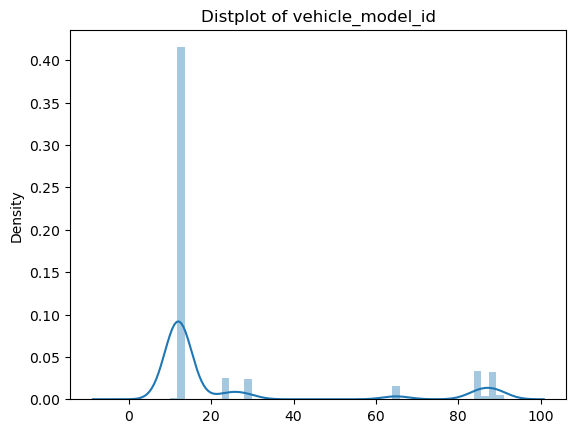

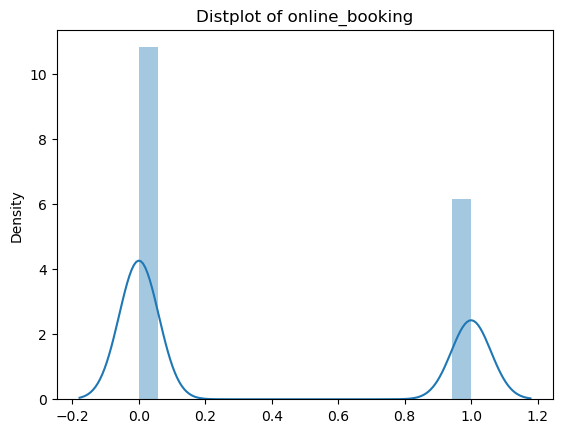

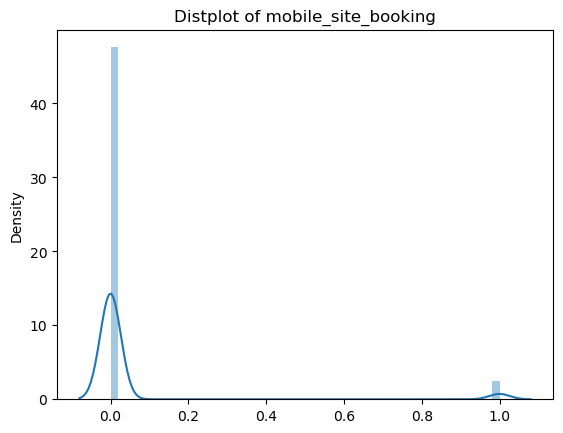

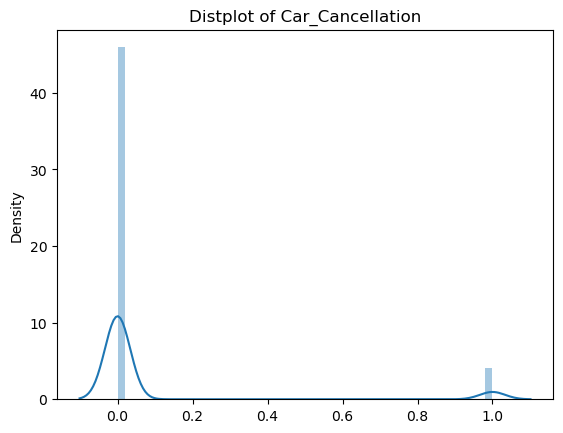

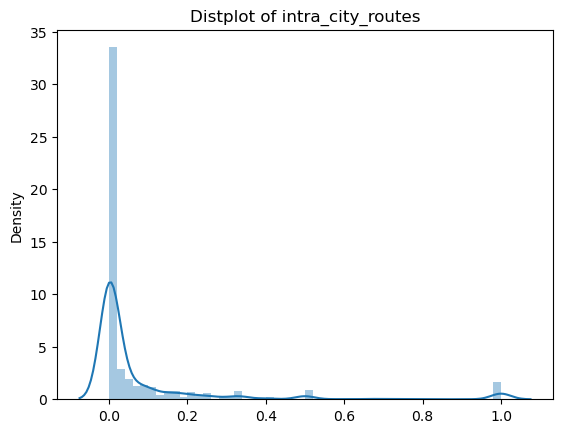

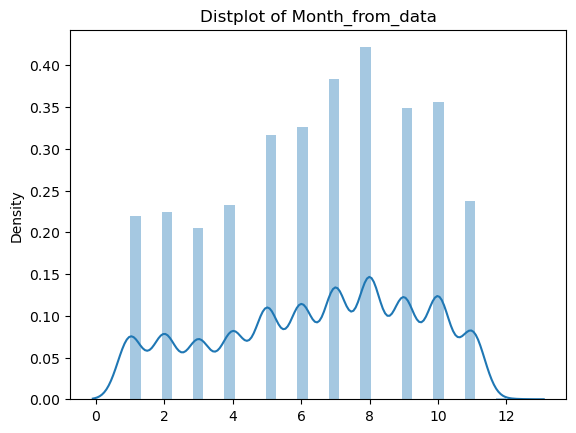

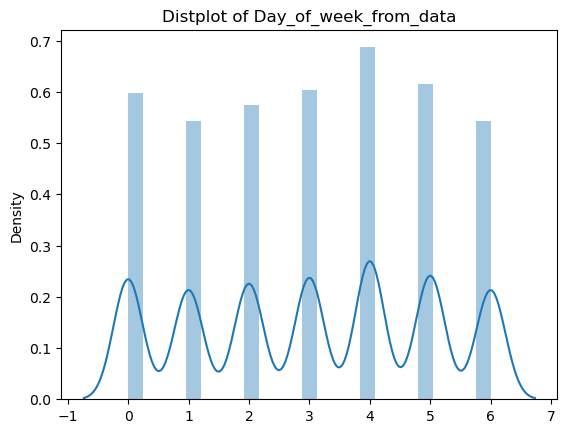

In [169]:
# Plot Destplot
for i in df_tt_2.select_dtypes(exclude=['object','category']):
   sns.distplot(x=df_tt_2[i])
   plt.title('Distplot of {}'.format(i))
   plt.show()

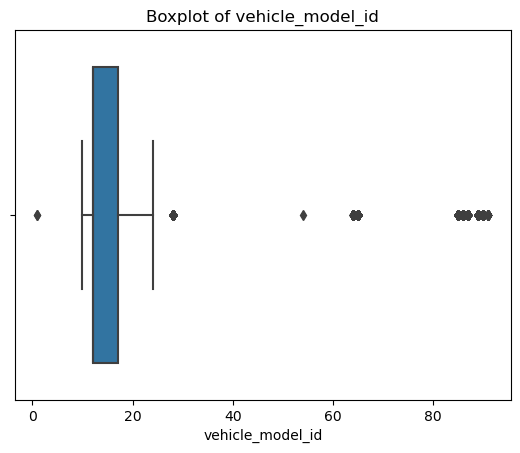

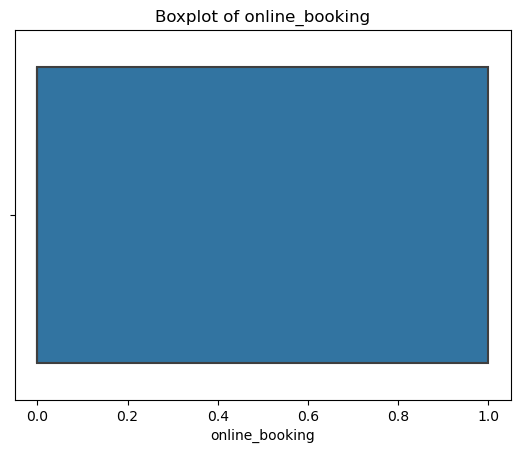

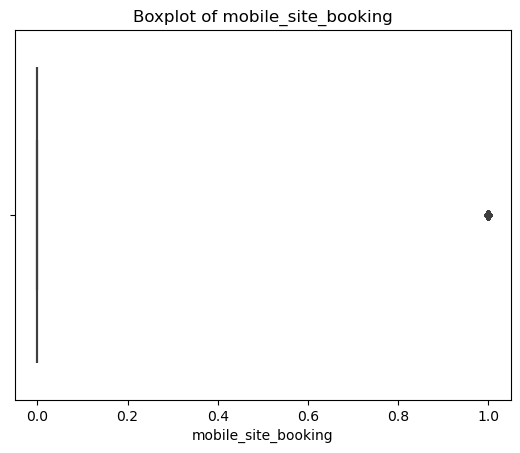

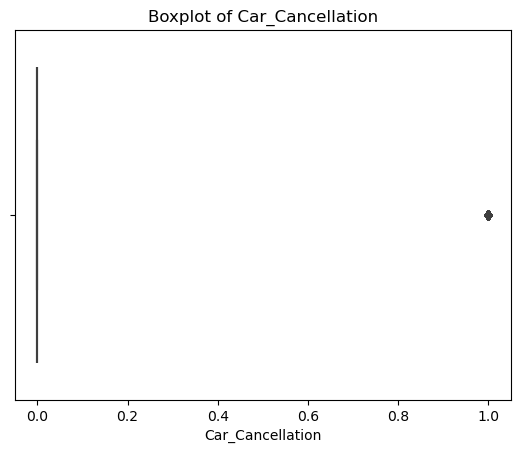

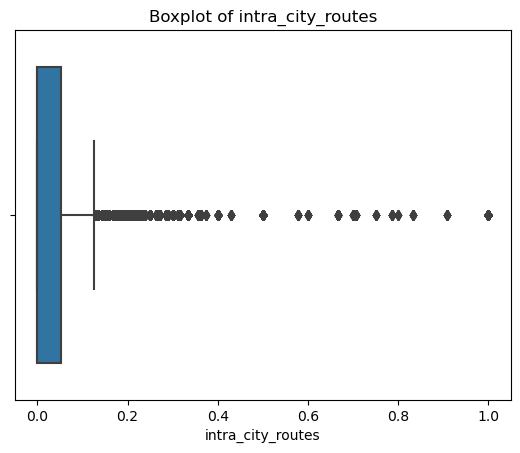

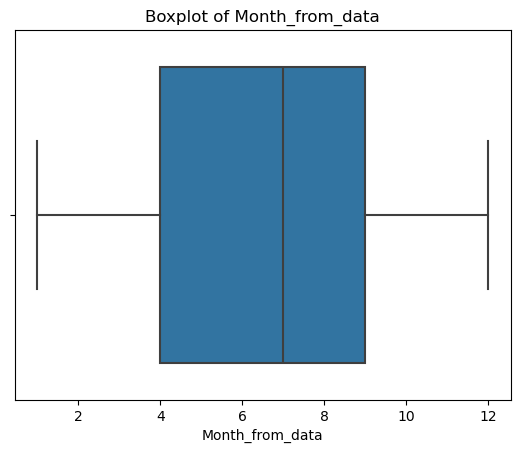

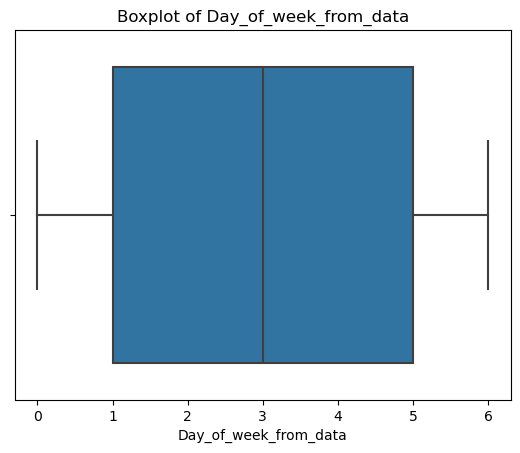

TypeError: Horizontal orientation requires numeric `x` variable.

In [170]:
# Boxplot
for i in df_tt_2.select_dtypes(exclude='object'):
  sns.boxplot(x=df_tt_2[i])
  plt.title('Boxplot of {}'.format(i))
  plt.show()

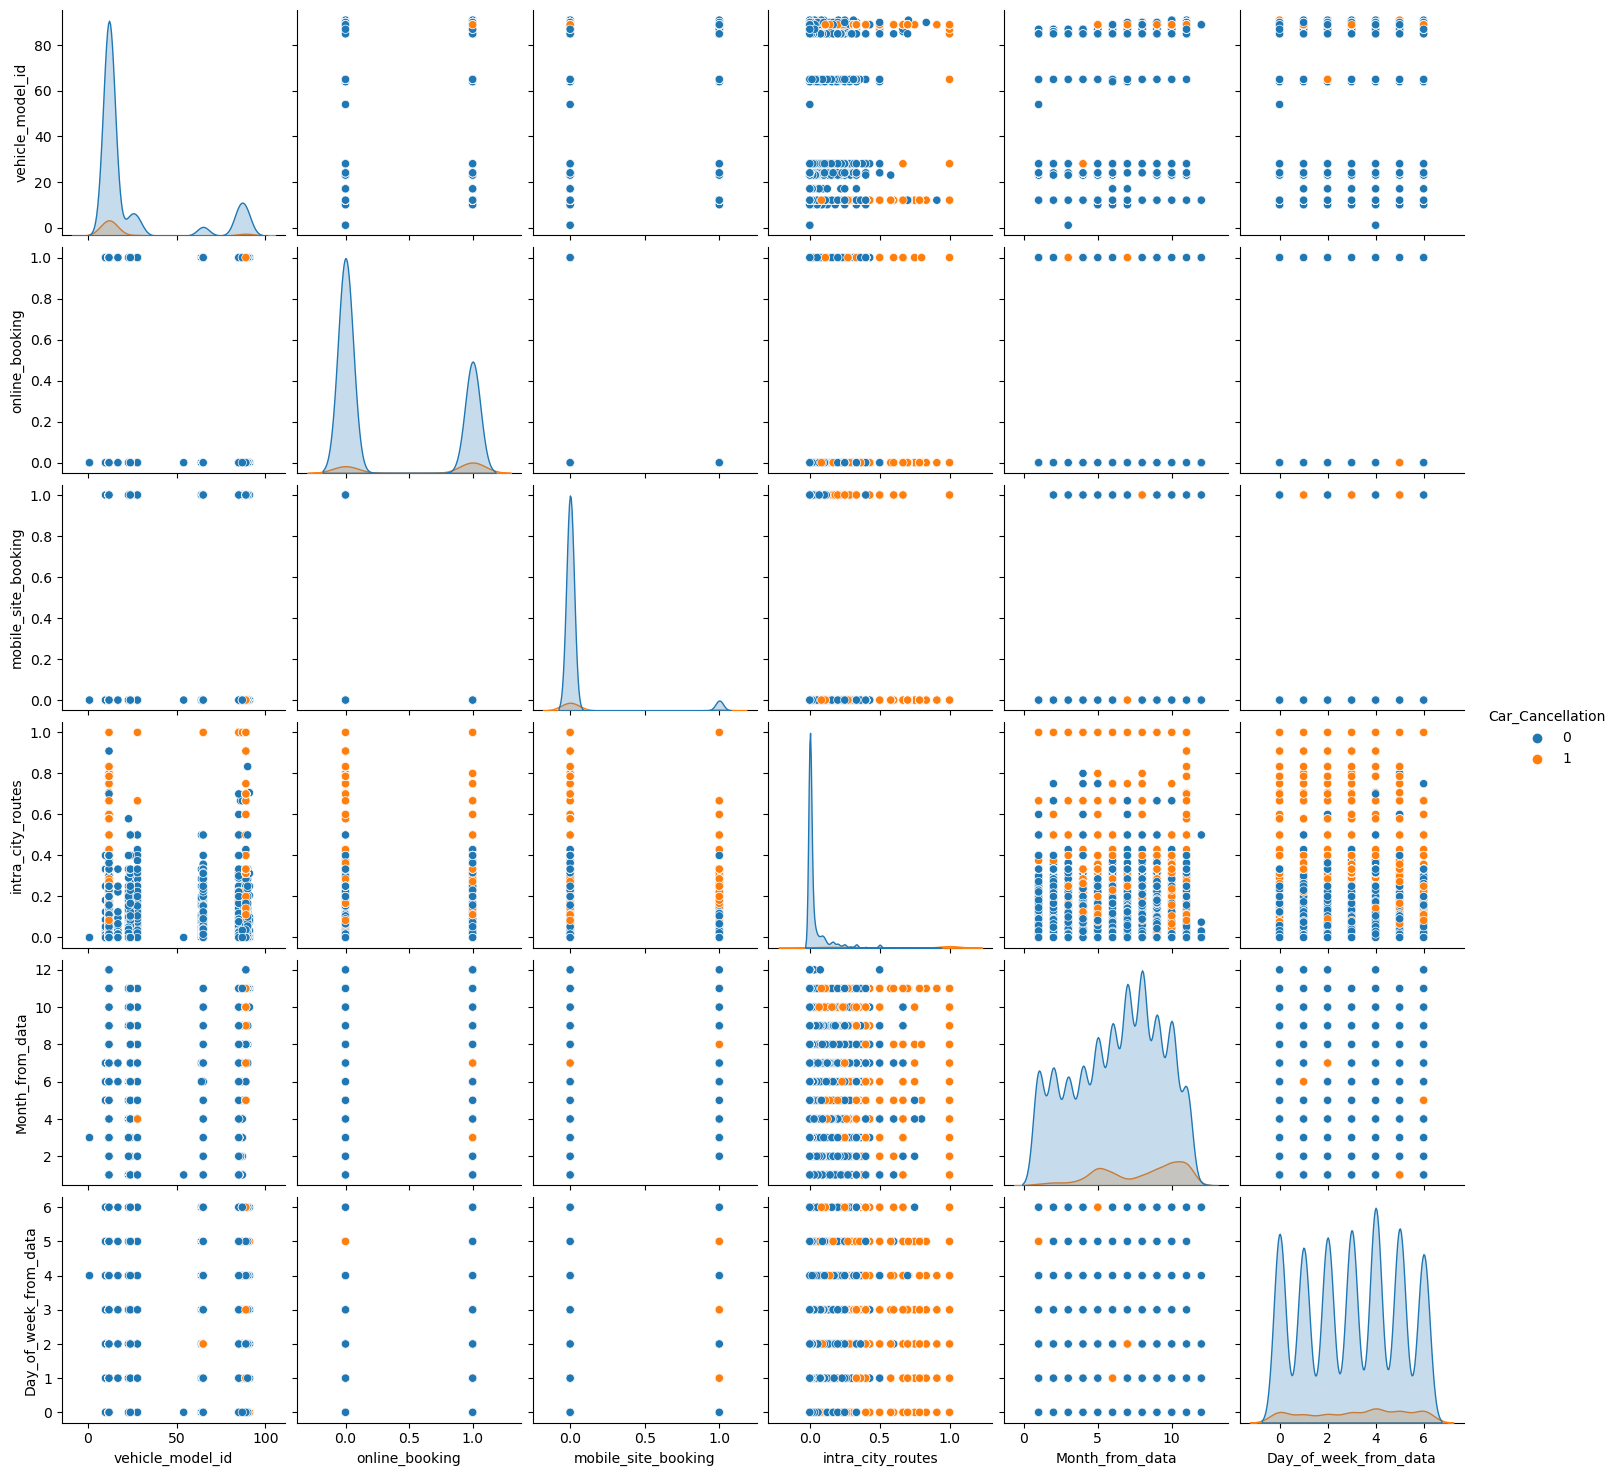

In [172]:
# Checking OurData is Linear
sns.pairplot(data=df_tt_2,hue='Car_Cancellation')

<Axes: >

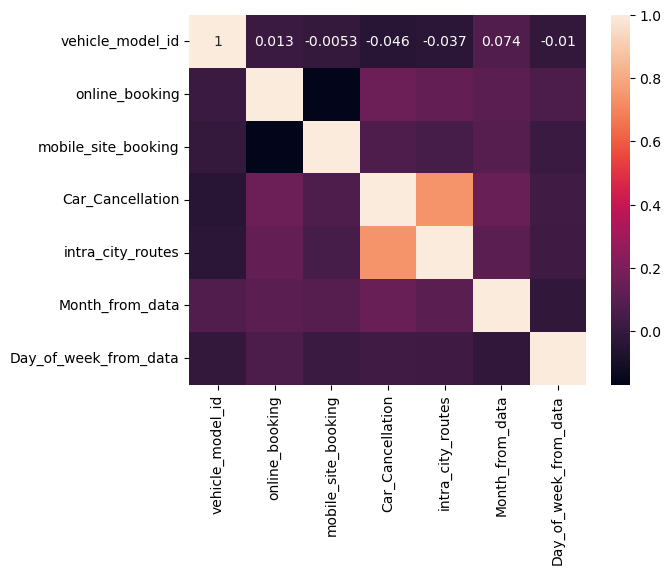

In [173]:
# Checking Correlation
corr=df_tt_2.corr()
sns.heatmap(corr,annot=True)

In [174]:
df_tt_2.columns

Index(['vehicle_model_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'intra_city_routes',
       'Cancel_perc_intra_city_routes', 'Month_from_data',
       'Day_of_week_from_data', 'Weekday/weekend', 'TimeofDay',
       'booking_nature'],
      dtype='object')

In [176]:
df_tt_2.head()

,vehicle_model_id,online_booking,mobile_site_booking,Car_Cancellation,intra_city_routes,Cancel_perc_intra_city_routes,Month_from_data,Day_of_week_from_data,Weekday/weekend,TimeofDay,booking_nature
0,28,0,0,0,0.0,Zero,1,1,Weekday,Night,Urgent
1,12,0,0,0,0.0,Zero,1,1,Weekday,Morning,SameDay
2,12,0,0,0,0.0,Zero,1,1,Weekday,Night,Urgent
3,12,0,0,0,0.0,Zero,1,1,Weekday,Night,Urgent
4,12,0,0,0,0.0,Zero,1,1,Weekday,Morning,Urgent


# Feature Eng

In [177]:
#Label=LabelEncoder()
#for i in df_tt_2.columns:
#  df_tt_2[i]=Label.fit_transform(df_tt_2[i])
#  df_tt_2



df_tt_2=pd.get_dummies(df_tt_2,columns=['Cancel_perc_intra_city_routes','TimeofDay','booking_nature','Weekday/weekend'],drop_first=True)

In [178]:
df_tt_2.head()

,vehicle_model_id,online_booking,mobile_site_booking,Car_Cancellation,intra_city_routes,Month_from_data,Day_of_week_from_data,Cancel_perc_intra_city_routes_Low,Cancel_perc_intra_city_routes_Median,Cancel_perc_intra_city_routes_Zero,TimeofDay_Morning,TimeofDay_Afternoon,TimeofDay_Evening,booking_nature_SameDay,booking_nature_Regular,booking_nature_Advance,Weekday/weekend_Weekend
0,28,0,0,0,0.0,1,1,0,0,1,0,0,0,0,0,0,0
1,12,0,0,0,0.0,1,1,0,0,1,1,0,0,1,0,0,0
2,12,0,0,0,0.0,1,1,0,0,1,0,0,0,0,0,0,0
3,12,0,0,0,0.0,1,1,0,0,1,0,0,0,0,0,0,0
4,12,0,0,0,0.0,1,1,0,0,1,1,0,0,0,0,0,0


In [179]:
# Split data
X=df_tt_2.drop('Car_Cancellation',axis=1).values
y=df_tt_2['Car_Cancellation'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100,stratify=y)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (27433, 16)
X_test (6859, 16)
y_train (27433,)
y_test (6859,)


# Model Building

In [180]:
#LogisticRegressionCV

lr=LogisticRegressionCV()
model=lr.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print('Train_accuracy_score',accuracy_score(y_pred_train,y_train))
print('Test_accuracy_score',accuracy_score(y_pred_test,y_test))
print('Train_classification_report',classification_report(y_pred_train,y_train))
print('Test_classification_report',classification_report(y_pred_test,y_test))

Train_accuracy_score 0.9604855466044545
Test_accuracy_score 0.9577197842251057
Train_classification_report               precision    recall  f1-score   support

           0       0.99      0.97      0.98     25859
           1       0.61      0.86      0.71      1574

    accuracy                           0.96     27433
   macro avg       0.80      0.91      0.85     27433
weighted avg       0.97      0.96      0.96     27433

Test_classification_report               precision    recall  f1-score   support

           0       0.99      0.96      0.98      6492
           1       0.57      0.86      0.69       367

    accuracy                           0.96      6859
   macro avg       0.78      0.91      0.83      6859
weighted avg       0.97      0.96      0.96      6859



In [181]:
# DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model=dtc.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print('Train_accuracy_score',accuracy_score(y_pred_train,y_train))
print('Test_accuracy_score',accuracy_score(y_pred_test,y_test))
print('Train_classification_report',classification_report(y_pred_train,y_train))
print('Test_classification_report',classification_report(y_pred_test,y_test))

Train_accuracy_score 0.9939853461159917
Test_accuracy_score 0.9454731010351363
Train_classification_report               precision    recall  f1-score   support

           0       1.00      0.99      1.00     25332
           1       0.94      0.99      0.96      2101

    accuracy                           0.99     27433
   macro avg       0.97      0.99      0.98     27433
weighted avg       0.99      0.99      0.99     27433

Test_classification_report               precision    recall  f1-score   support

           0       0.97      0.97      0.97      6316
           1       0.65      0.67      0.66       543

    accuracy                           0.95      6859
   macro avg       0.81      0.82      0.81      6859
weighted avg       0.95      0.95      0.95      6859



In [182]:
# KNeighborsClassifier
Knn=KNeighborsClassifier()
model=Knn.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print('Train_accuracy_score',accuracy_score(y_pred_train,y_train))
print('Test_accuracy_score',accuracy_score(y_pred_test,y_test))
print('Train_classification_report',classification_report(y_pred_train,y_train))
print('Test_classification_report',classification_report(y_pred_test,y_test))

Train_accuracy_score 0.9669376298618452
Test_accuracy_score 0.9549497011226126
Train_classification_report               precision    recall  f1-score   support

           0       0.99      0.97      0.98     25668
           1       0.69      0.87      0.77      1765

    accuracy                           0.97     27433
   macro avg       0.84      0.92      0.88     27433
weighted avg       0.97      0.97      0.97     27433

Test_classification_report               precision    recall  f1-score   support

           0       0.99      0.96      0.98      6477
           1       0.57      0.82      0.67       382

    accuracy                           0.95      6859
   macro avg       0.78      0.89      0.82      6859
weighted avg       0.97      0.95      0.96      6859



In [183]:
# SVC

svc=SVC()
model=svc.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print('Train_accuracy_score',accuracy_score(y_pred_train,y_train))
print('Test_accuracy_score',accuracy_score(y_pred_test,y_test))
print('Train_classification_report',classification_report(y_pred_train,y_train))
print('Test_classification_report',classification_report(y_pred_test,y_test))

Train_accuracy_score 0.9518463164801516
Test_accuracy_score 0.9478058025951305
Train_classification_report               precision    recall  f1-score   support

           0       1.00      0.95      0.97     26484
           1       0.42      0.97      0.58       949

    accuracy                           0.95     27433
   macro avg       0.71      0.96      0.78     27433
weighted avg       0.98      0.95      0.96     27433

Test_classification_report               precision    recall  f1-score   support

           0       1.00      0.95      0.97      6654
           1       0.36      0.98      0.53       205

    accuracy                           0.95      6859
   macro avg       0.68      0.96      0.75      6859
weighted avg       0.98      0.95      0.96      6859



In [184]:
# Naive_Byes
nb_model = GaussianNB()
model=nb_model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print('Train_accuracy_score',accuracy_score(y_pred_train,y_train))
print('Test_accuracy_score',accuracy_score(y_pred_test,y_test))
print('Train_classification_report',classification_report(y_pred_train,y_train))
print('Test_classification_report',classification_report(y_pred_test,y_test))

Train_accuracy_score 0.7743958006780155
Test_accuracy_score 0.7693541332555767
Train_classification_report               precision    recall  f1-score   support

           0       0.76      1.00      0.86     19108
           1       0.98      0.26      0.41      8325

    accuracy                           0.77     27433
   macro avg       0.87      0.63      0.64     27433
weighted avg       0.82      0.77      0.72     27433

Test_classification_report               precision    recall  f1-score   support

           0       0.75      1.00      0.86      4752
           1       0.97      0.26      0.41      2107

    accuracy                           0.77      6859
   macro avg       0.86      0.63      0.63      6859
weighted avg       0.82      0.77      0.72      6859

